# Ресурсы



**Базовые инструменты и данные для анализа**

In [195]:
import time
from typing import Literal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy

In [196]:
train_data = pd.read_csv('train.csv')

In [197]:
test_data = pd.read_csv('test.csv')

**Инструменты визуализации**

# Подготовим данные



# Проведем первичный осмотр

In [198]:
train_data.head()

ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  EmploymentStatus  EducationLevel  Experience  NetWorth  \
0  ...          Employed       Associate         4.0   35067.0   
1  ...          Employed     High School        33.0   27001.0   
2  ...          Employed        Bachelor        28.0  278382.0   
3  ...          Employed     High School         0.0    9224.0   
4  ...          Employed        Bachelor        31.0    4502.0   

   BaseInterestRate InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.257790     0.251465          508.970230                0.288013   
1          0.086110     0.093173          514.675859                0.050585   
2          0.108436     0.115443         1268.276385                0.072571   
3          0.100686     0.112822          498.505187                0.225415   
4          0.110437     0.089037          756.035156                0.052721   

   LoanApproved  RiskScore  
0           0.0  66.176500  
1           1.0  28.495737  
2           1.0  34.488104  
3           1.0  36.910753  
4           1.0  31.347091  

[5 rows x 36 columns]

# Оценим количество категориальных и чиловых признаков


In [199]:
categorical_features = train_data.drop(columns='RiskScore').select_dtypes(object).columns
categorical_features

Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')

In [200]:
numeric_features = train_data.drop(columns='RiskScore').select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features

['Age',
 'AnnualIncome',
 'CreditScore',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'Experience',
 'NetWorth',
 'BaseInterestRate',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio',
 'LoanApproved']

# Поработаем с дубликатами

In [201]:
train_data.shape

(11017, 36)

In [202]:
train_data = train_data.drop_duplicates()
train_data.shape

(10001, 36)

In [203]:
test_data.shape

(5000, 36)

In [204]:
test_data = test_data.drop_duplicates()
test_data.shape

(5000, 36)

# Оценим долю пустых значений


In [205]:
train_data['RiskScore'].isna().agg({'NA count': 'sum', 'NA rate': 'mean'})

NA count    1.0000
NA rate     0.0001
Name: RiskScore, dtype: float64

In [206]:
pd.DataFrame({'NA count': train_data.isna().sum(), 'NA rate': train_data.isna().mean()})

NA count   NA rate
ApplicationDate                    1  0.000100
Age                                1  0.000100
AnnualIncome                       1  0.000100
CreditScore                      472  0.047195
LoanAmount                       472  0.047195
LoanDuration                       1  0.000100
MaritalStatus                      1  0.000100
NumberOfDependents                 1  0.000100
HomeOwnershipStatus                1  0.000100
MonthlyDebtPayments              472  0.047195
CreditCardUtilizationRate          1  0.000100
NumberOfOpenCreditLines            1  0.000100
NumberOfCreditInquiries            1  0.000100
DebtToIncomeRatio                  1  0.000100
BankruptcyHistory                472  0.047195
LoanPurpose                      472  0.047195
PreviousLoanDefaults               1  0.000100
PaymentHistory                     1  0.000100
LengthOfCreditHistory              1  0.000100
SavingsAccountBalance              1  0.000100
CheckingAccountBalance           472  0.047195
TotalAssets                      472  0.047195
TotalLiabilities                   1  0.000100
MonthlyIncome                      1  0.000100
UtilityBillsPaymentHistory         1  0.000100
JobTenure                          1  0.000100
EmploymentStatus                   1  0.000100
EducationLevel                     1  0.000100
Experience                         1  0.000100
NetWorth                         472  0.047195
BaseInterestRate                 472  0.047195
InterestRate                       1  0.000100
MonthlyLoanPayment                 1  0.000100
TotalDebtToIncomeRatio             1  0.000100
LoanApproved                       1  0.000100
RiskScore                          1  0.000100

Сразу оценим и тестовую выборку, чтобы понимать, какими инструментами можно решить проблему пустых значений.

In [207]:
pd.DataFrame({'NA count': test_data.isna().sum(), 'NA rate': test_data.isna().mean()})

NA count  NA rate
ID                                 0      0.0
ApplicationDate                    0      0.0
Age                                0      0.0
AnnualIncome                       0      0.0
CreditScore                        0      0.0
LoanAmount                         0      0.0
LoanDuration                       0      0.0
MaritalStatus                      0      0.0
NumberOfDependents                 0      0.0
HomeOwnershipStatus                0      0.0
MonthlyDebtPayments                0      0.0
CreditCardUtilizationRate          0      0.0
NumberOfOpenCreditLines            0      0.0
NumberOfCreditInquiries            0      0.0
DebtToIncomeRatio                  0      0.0
BankruptcyHistory                  0      0.0
LoanPurpose                        0      0.0
PreviousLoanDefaults               0      0.0
PaymentHistory                     0      0.0
LengthOfCreditHistory              0      0.0
SavingsAccountBalance              0      0.0
CheckingAccountBalance             0      0.0
TotalAssets                        0      0.0
TotalLiabilities                   0      0.0
MonthlyIncome                      0      0.0
UtilityBillsPaymentHistory         0      0.0
JobTenure                          0      0.0
EmploymentStatus                   0      0.0
EducationLevel                     0      0.0
Experience                         0      0.0
NetWorth                           0      0.0
BaseInterestRate                   0      0.0
InterestRate                       0      0.0
MonthlyLoanPayment                 0      0.0
TotalDebtToIncomeRatio             0      0.0
LoanApproved                       0      0.0

В тестовой выборке пропуски и вовсе отсуствуют.

В целом, ситуация неплохая. Число пустых значений - если таковые наблюдаются - не превышает 5% от общего числа записей.


In [208]:
train_data.dropna(subset=['RiskScore'], axis='rows', inplace=True)

/tmp/ipython-input-208-2385612354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(subset=['RiskScore'], axis='rows', inplace=True)


In [209]:
pd.DataFrame({'NA count': train_data.isna().sum(), 'NA rate': train_data.isna().mean()})

NA count  NA rate
ApplicationDate                    0   0.0000
Age                                0   0.0000
AnnualIncome                       0   0.0000
CreditScore                      471   0.0471
LoanAmount                       471   0.0471
LoanDuration                       0   0.0000
MaritalStatus                      0   0.0000
NumberOfDependents                 0   0.0000
HomeOwnershipStatus                0   0.0000
MonthlyDebtPayments              471   0.0471
CreditCardUtilizationRate          0   0.0000
NumberOfOpenCreditLines            0   0.0000
NumberOfCreditInquiries            0   0.0000
DebtToIncomeRatio                  0   0.0000
BankruptcyHistory                471   0.0471
LoanPurpose                      471   0.0471
PreviousLoanDefaults               0   0.0000
PaymentHistory                     0   0.0000
LengthOfCreditHistory              0   0.0000
SavingsAccountBalance              0   0.0000
CheckingAccountBalance           471   0.0471
TotalAssets                      471   0.0471
TotalLiabilities                   0   0.0000
MonthlyIncome                      0   0.0000
UtilityBillsPaymentHistory         0   0.0000
JobTenure                          0   0.0000
EmploymentStatus                   0   0.0000
EducationLevel                     0   0.0000
Experience                         0   0.0000
NetWorth                         471   0.0471
BaseInterestRate                 471   0.0471
InterestRate                       0   0.0000
MonthlyLoanPayment                 0   0.0000
TotalDebtToIncomeRatio             0   0.0000
LoanApproved                       0   0.0000
RiskScore                          0   0.0000

Все те же 5%. Заменим пропуски в числовых признаках на среднее значение, в категориальных - на модальное.

In [210]:
train_data[numeric_features] = train_data[numeric_features].fillna(train_data[numeric_features].mean())

/tmp/ipython-input-210-2681328228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numeric_features] = train_data[numeric_features].fillna(train_data[numeric_features].mean())


In [211]:
for feature in categorical_features :
  train_data[feature] = train_data[feature].fillna(train_data[feature].mode()[0])

/tmp/ipython-input-211-3565968687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature] = train_data[feature].fillna(train_data[feature].mode()[0])


In [212]:
pd.DataFrame({'NA count': train_data.isna().sum(), 'NA rate': train_data.isna().mean()})

NA count  NA rate
ApplicationDate                    0      0.0
Age                                0      0.0
AnnualIncome                       0      0.0
CreditScore                        0      0.0
LoanAmount                         0      0.0
LoanDuration                       0      0.0
MaritalStatus                      0      0.0
NumberOfDependents                 0      0.0
HomeOwnershipStatus                0      0.0
MonthlyDebtPayments                0      0.0
CreditCardUtilizationRate          0      0.0
NumberOfOpenCreditLines            0      0.0
NumberOfCreditInquiries            0      0.0
DebtToIncomeRatio                  0      0.0
BankruptcyHistory                  0      0.0
LoanPurpose                        0      0.0
PreviousLoanDefaults               0      0.0
PaymentHistory                     0      0.0
LengthOfCreditHistory              0      0.0
SavingsAccountBalance              0      0.0
CheckingAccountBalance             0      0.0
TotalAssets                        0      0.0
TotalLiabilities                   0      0.0
MonthlyIncome                      0      0.0
UtilityBillsPaymentHistory         0      0.0
JobTenure                          0      0.0
EmploymentStatus                   0      0.0
EducationLevel                     0      0.0
Experience                         0      0.0
NetWorth                           0      0.0
BaseInterestRate                   0      0.0
InterestRate                       0      0.0
MonthlyLoanPayment                 0      0.0
TotalDebtToIncomeRatio             0      0.0
LoanApproved                       0      0.0
RiskScore                          0      0.0

In [213]:
train_data.shape

(10000, 36)

ГОООООООООООООООООООЛ

# Отдельно поработаем с категориальными значениями.

In [214]:
train_data[categorical_features].nunique()

ApplicationDate        10000
MaritalStatus              4
HomeOwnershipStatus        4
LoanPurpose                5
EmploymentStatus           3
EducationLevel             5
dtype: int64

Немало.

In [215]:
train_data['ApplicationDate'][0]

'2010-06-26'

In [216]:
print(f"MaritalStatus: {np.unique(train_data['MaritalStatus'].values)}")
print(f"HomeOwnershipStatus: {np.unique(train_data['HomeOwnershipStatus'].values)}")
print(f"LoanPurpose: {np.unique(train_data['LoanPurpose'].values)}")
print(f"EmploymentStatus: {np.unique(train_data['EmploymentStatus'].values)}")
print(f"EducationLevel: {np.unique(train_data['EducationLevel'].values)}")

MaritalStatus: ['Divorced' 'Married' 'Single' 'Widowed']
HomeOwnershipStatus: ['Mortgage' 'Other' 'Own' 'Rent']
LoanPurpose: ['Auto' 'Debt Consolidation' 'Education' 'Home' 'Other']
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['Associate' 'Bachelor' 'Doctorate' 'High School' 'Master']


К атомарным признакам применим one-hot-encode. К составным - в данном случае только ApplicationDate - разбиение на более простые параметры - day, month, year.

In [217]:
def decompose_application_date(df):
  df2 = df.copy()
  df2['ApplicationDate']  = pd.to_datetime(df2['ApplicationDate'], format='%Y-%m-%d')
  df2['ApplicationYear']  = df2['ApplicationDate'].dt.year
  df2['ApplicationMonth'] = df2['ApplicationDate'].dt.month
  df2['ApplicationDay']   = df2['ApplicationDate'].dt.day
  df2.drop(columns=['ApplicationDate'], inplace=True)
  return df2

train_data = decompose_application_date(train_data)
test_data  = decompose_application_date(test_data)

In [218]:
def custom_one_hot_encode(df, feature_list) :
  df2 = df.copy()
  for i in range(0, len(feature_list)):
    values = np.unique(df2[feature_list[i]].values)
    for j in range(0, max(1, len(values) - 1)):
      formatted = ''.join(ch for ch in values[j] if ch.isalpha())
      new_feat = feature_list[i] + formatted
      df2[new_feat] = df2[feature_list[i]] == values[j]
      df2[new_feat] = df2[new_feat].astype(int)
    df2.drop(columns=feature_list[i], inplace=True)
  return df2

f = list(categorical_features)
f.remove('ApplicationDate')

train_data = custom_one_hot_encode(train_data, f)
test_data  = custom_one_hot_encode(test_data, f)

# Поработаем с выбросами целевого параметра

# Определим функции визуализации

In [219]:
def show_dependency(df, xcol, ycol):
  corr_matrix = df[[xcol, ycol]].corr()
  x = df[xcol]
  y = df[ycol]
  p = np.poly1d(np.polyfit(x, y, 1))
  plt.figure(figsize=(15, 9))
  plt.scatter(x, y, alpha=0.5)
  plt.ylim(np.min(plt.yticks()[0]), np.max(plt.yticks()[0]))
  plt.plot(x, p(x), "r--")
  plt.scatter([], [], alpha=0, label=f'Correlation: {corr_matrix[xcol][ycol]:.3f}')
  plt.xlabel(xcol)
  plt.ylabel(ycol)
  plt.title(f'Dependency {ycol} on {xcol}')
  plt.grid(True)
  plt.legend()
  plt.show()


def build_distribution(values, column):
  sns.kdeplot(values, fill=True, cut=0)
  plt.plot([values.mean(), values.mean()], [0, np.max(plt.yticks()[0])], label='AVG')
  plt.scatter([], [], alpha=0, label=f'Asymmetry: {scipy.stats.skew(values):.3f}')
  plt.scatter([], [], alpha=0, label=f'Excess {scipy.stats.kurtosis(values):.3f}')
  plt.title(f'Density {column}')
  plt.legend()

def show_distribution(df, column):
    plt.figure(figsize=(13, 5))

    plt.subplot(1, 2, 1)
    build_distribution(df[column], column)

    plt.subplot(1, 2, 2)
    box = plt.boxplot(
        df[column],
        tick_labels=[column],
        showmeans=True,
        meanline=True,
        whis=1.5,
    )

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Boxplot of {column}')

    stats = {
        'Median': np.median(df[column]),
        'Mean': np.mean(df[column]),
        'Q1': np.percentile(df[column], 25),
        'Q3': np.percentile(df[column], 75)
    }
    for i, (k, v) in enumerate(stats.items()):
        plt.text(1.1, 0.9 - i*0.1, f'{k}: {v:.2f}',
                 transform=plt.gca().transAxes, fontsize=10)

    plt.tight_layout()
    plt.show()

def show_distributions(df, columns):
  cnt = len(columns)
  rows = (cnt + 1) // 2
  plt.figure(figsize=(13, 6 * rows))
  for i in range(len(columns)):
    plt.subplot(rows, 2, i + 1)
    build_distribution(df[columns[i]], columns[i])
  plt.show()

def compare_distribution(df, left_column, right_column):
  plt.figure(figsize=(13, 5))
  plt.subplot(1, 2, 1)
  build_distribution(df[left_column], left_column)
  plt.subplot(1, 2, 2)
  build_distribution(df[right_column], right_column)
  plt.show()

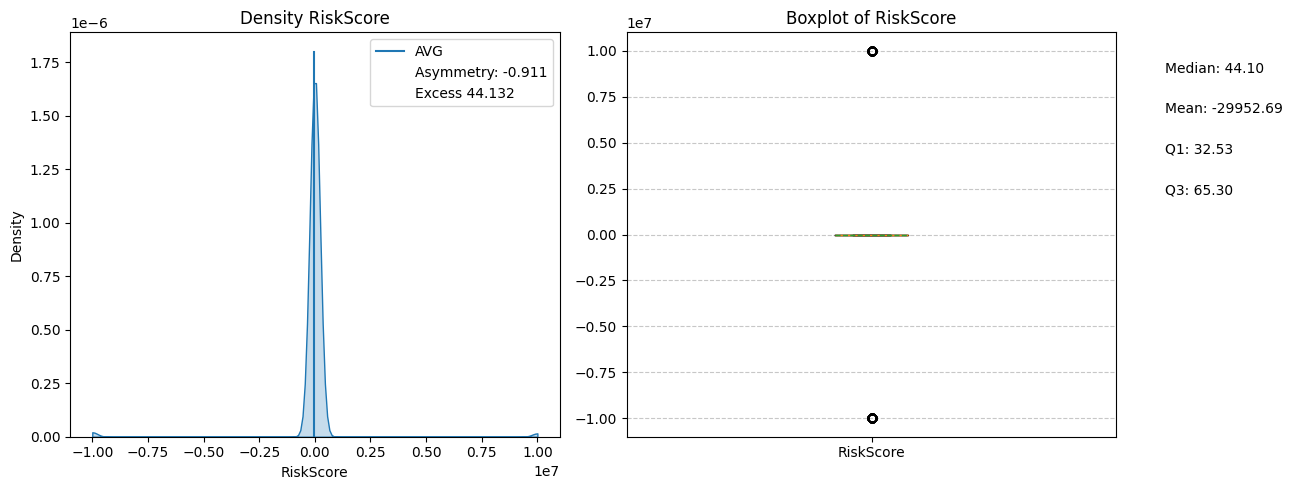

In [220]:
show_distribution(train_data, 'RiskScore')

Показатель эксцесса говорит о непривычно большой нагрузке на краевых значениях - относительно нормального распределения. Избавимся от артефактов, используя IQR.


In [221]:
train_data[train_data['RiskScore'] < 0]['RiskScore'].sort_values()

33     -9999999.0
56     -9999999.0
83     -9999999.0
183    -9999999.0
198    -9999999.0
          ...    
9148   -9999999.0
9263   -9999999.0
9710   -9999999.0
9959   -9999999.0
9987   -9999999.0
Name: RiskScore, Length: 121, dtype: float64

In [222]:
train_data[train_data['RiskScore'] > 100]['RiskScore'].sort_values()

237     10000000.0
398     10000000.0
657     10000000.0
1168    10000000.0
1253    10000000.0
           ...    
9734    10000000.0
9762    10000000.0
9764    10000000.0
9791    10000000.0
9929    10000000.0
Name: RiskScore, Length: 91, dtype: float64

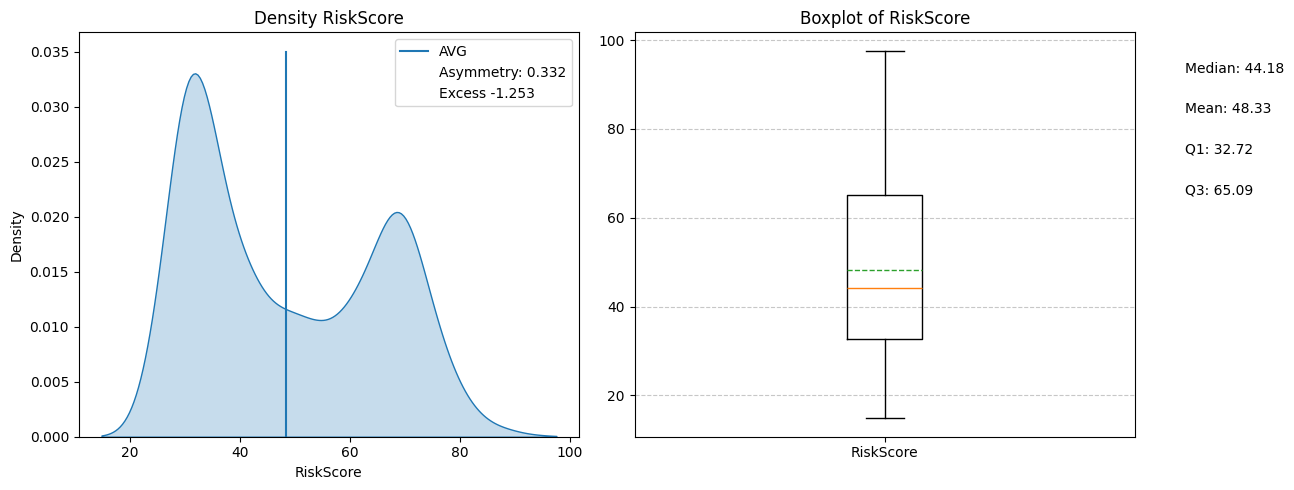

In [223]:
#Q1 = train_data['RiskScore'].quantile(0.25)
#Q3 = train_data['RiskScore'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
train_data.drop(train_data[train_data['RiskScore'] < 0].index, inplace=True)
train_data.drop(train_data[train_data['RiskScore'] > 100].index, inplace=True)

show_distribution(train_data, 'RiskScore')

# Потрогаем прочие параметры и их зависимости

In [224]:
buff_train_data = train_data.copy()
buff_test_data = test_data.copy()

In [225]:
def show_corr_matrix(df, min_corr = 0, annot = False, dropTarget = True, fmt='.2g', figsize=(12, 6), grid=False):
    if dropTarget:
      df = df.drop(columns='RiskScore', errors='ignore')
    corr_matrix = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix[corr_matrix.abs() > min_corr], cmap='coolwarm', vmin=-1, vmax=1, annot=annot, fmt=fmt)
    plt.title("Корреляционная матрица")
    plt.grid(grid)
    plt.show()

def show_corr_column(df, column, min_corr = 0, annot = False, dropTarget = True, fmt='.2g', figsize=(8, 6), grid=False):
    if dropTarget:
      df = df.drop(columns='RiskScore', errors='ignore')
    corr_column = df.corrwith(df[column]).drop(index=column)
    corr_column = corr_column[corr_column.abs() > min_corr]
    plt.figure(figsize=figsize)
    sns.heatmap(corr_column.values.reshape(-1, 1), xticklabels=[column], yticklabels=corr_column.index,
                cmap='coolwarm', vmin=-1, vmax=1, annot=annot, fmt=fmt)
    plt.title("Корреляционная матрица")
    plt.grid(grid)
    plt.show()


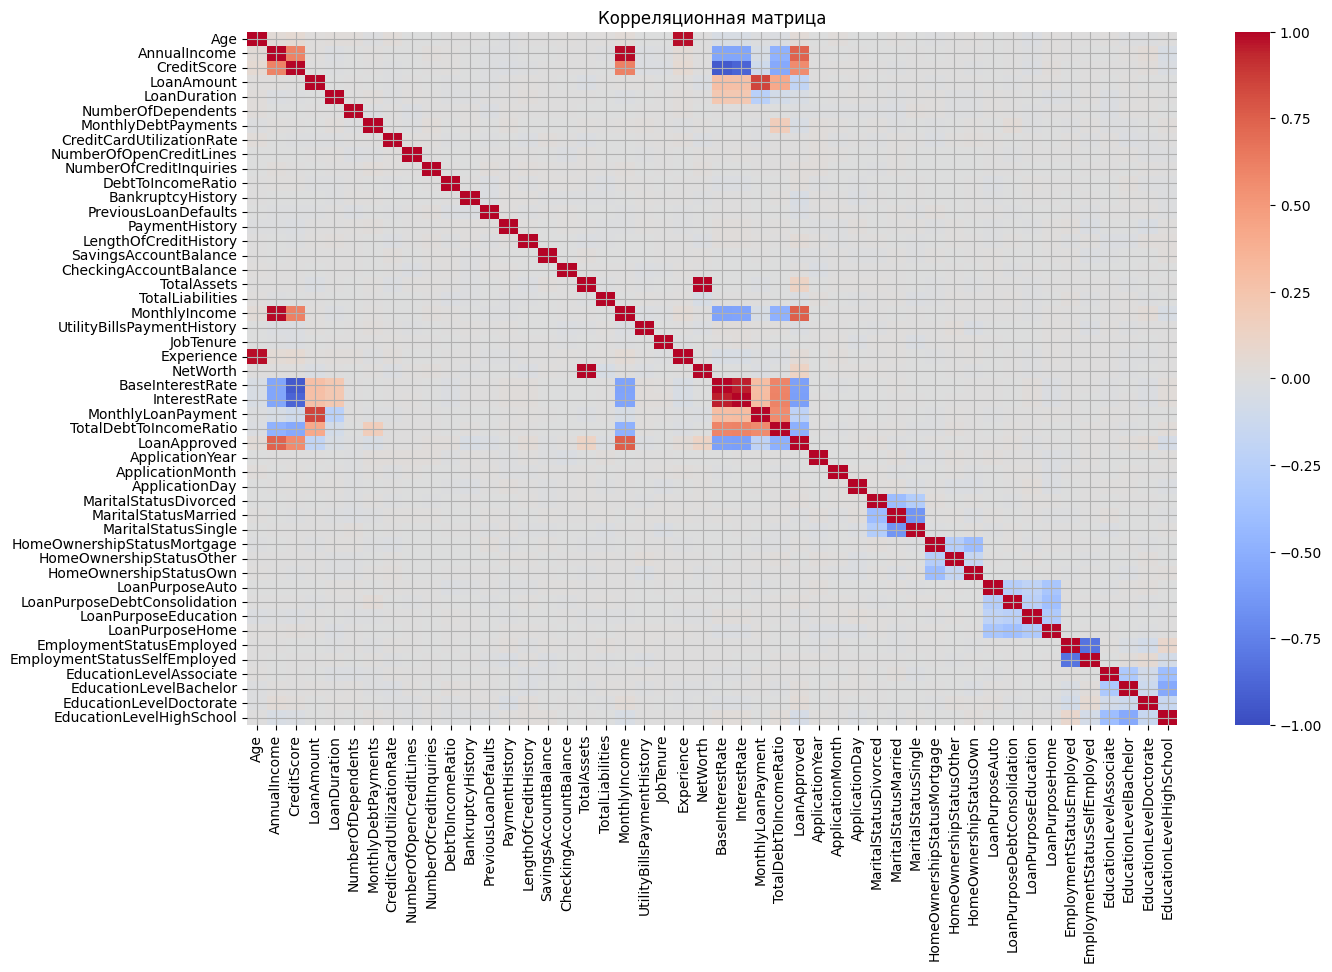

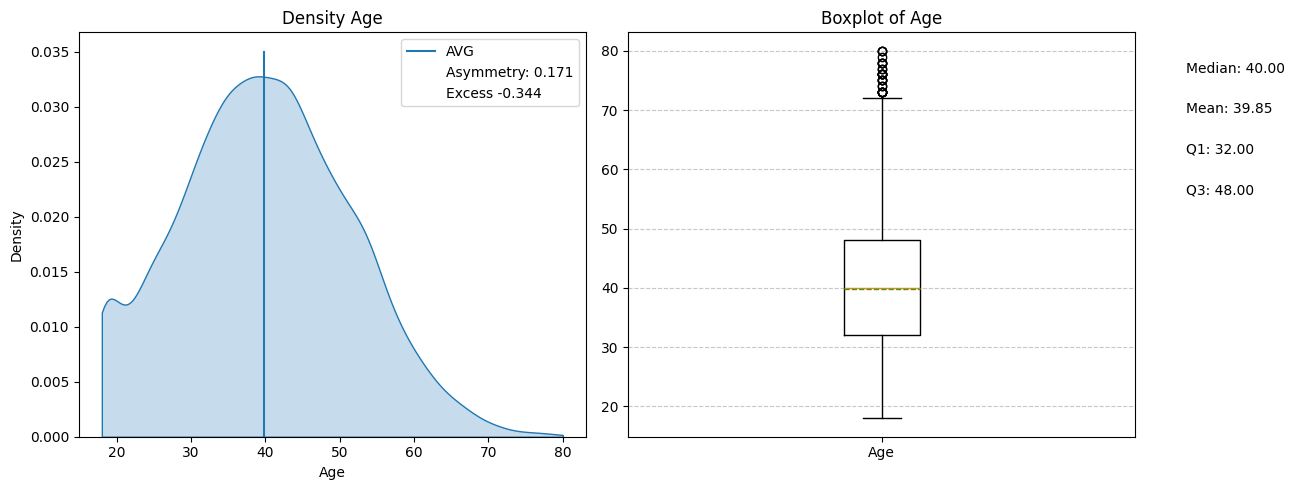

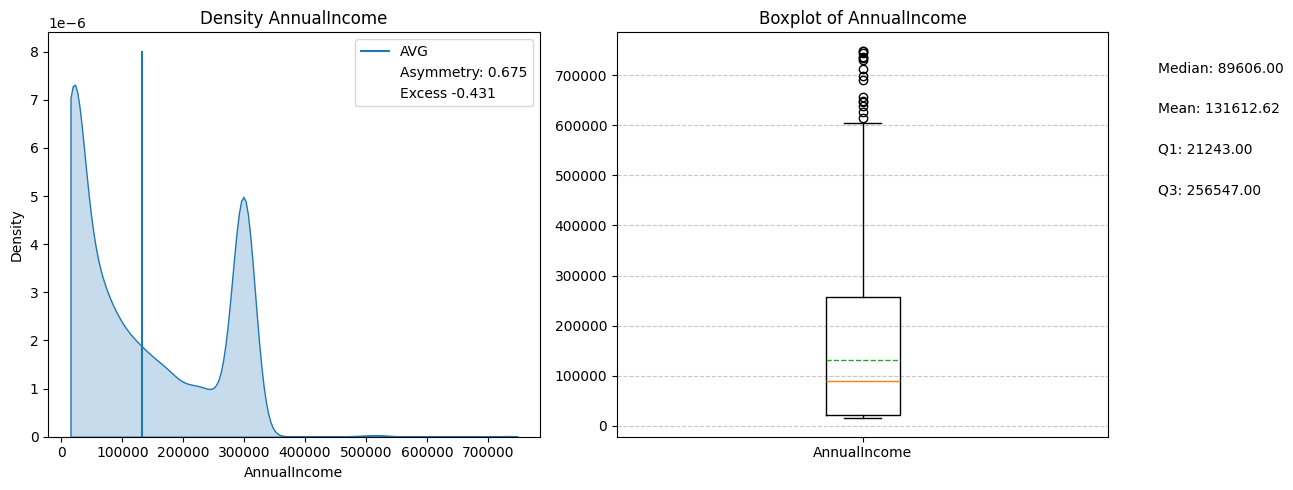

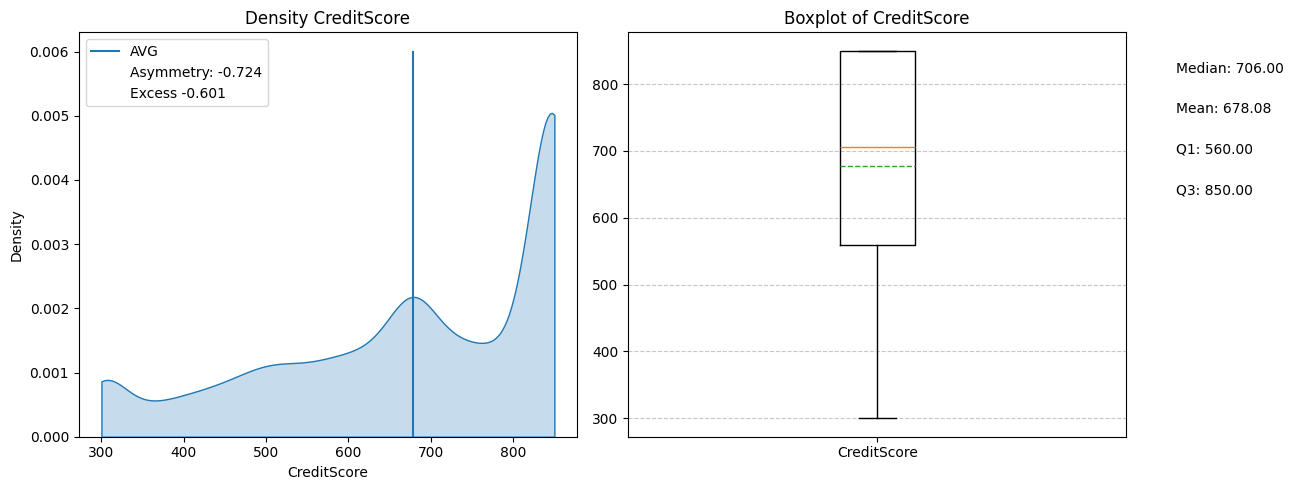

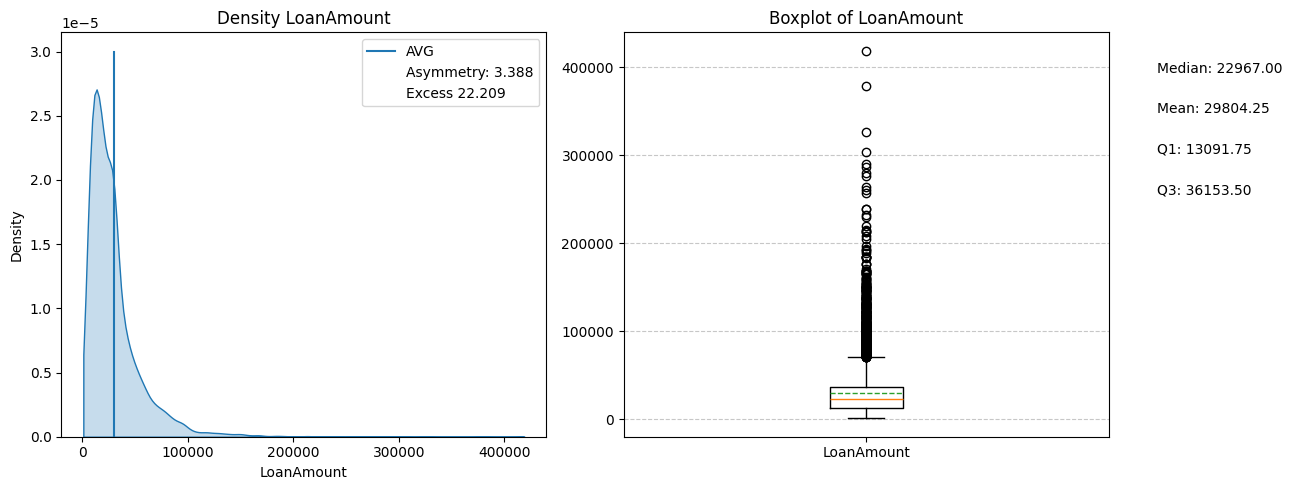

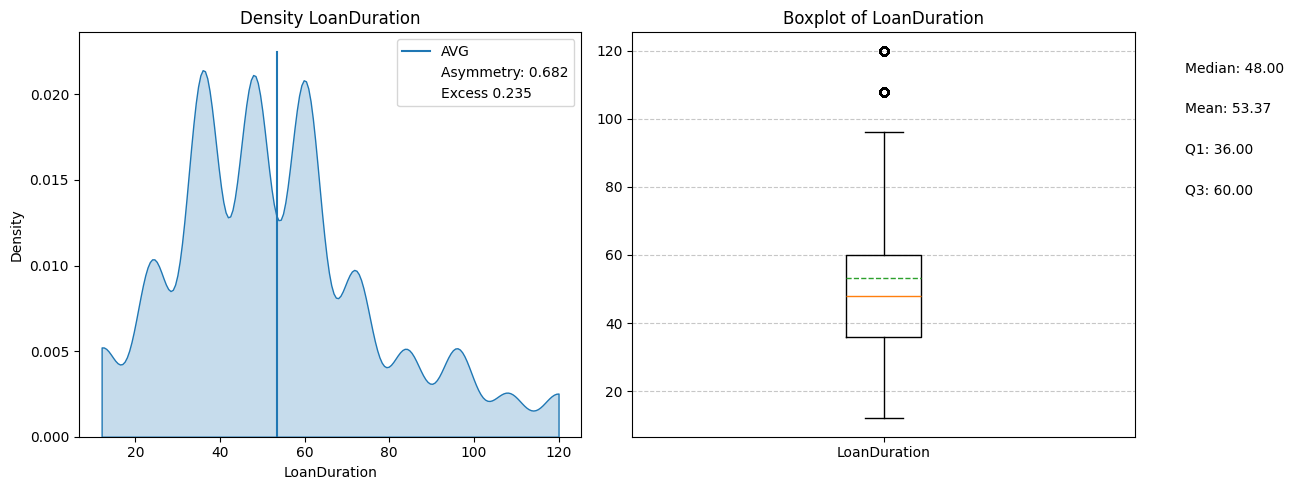

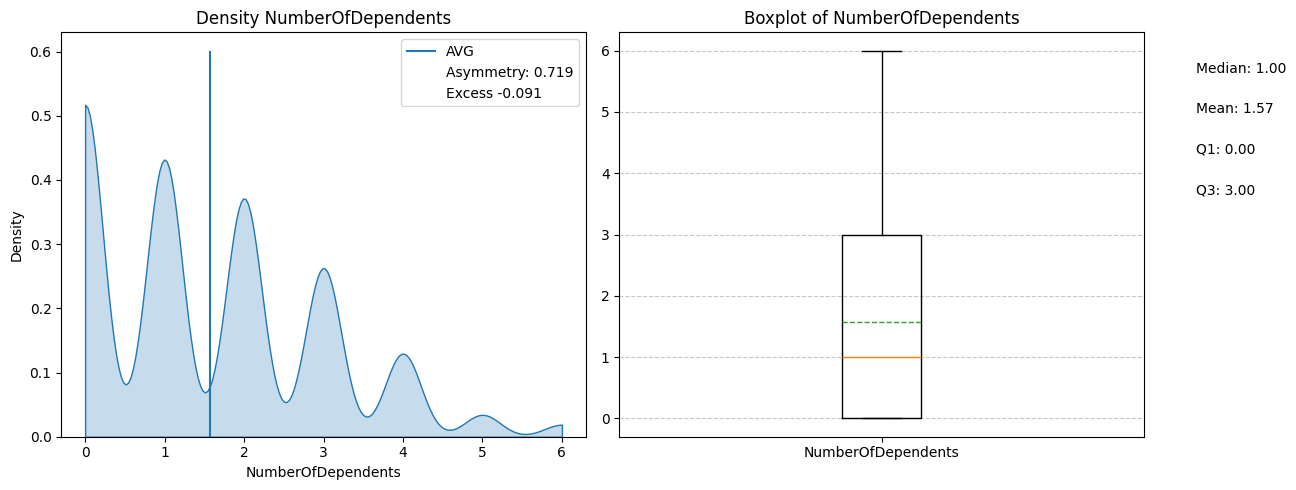

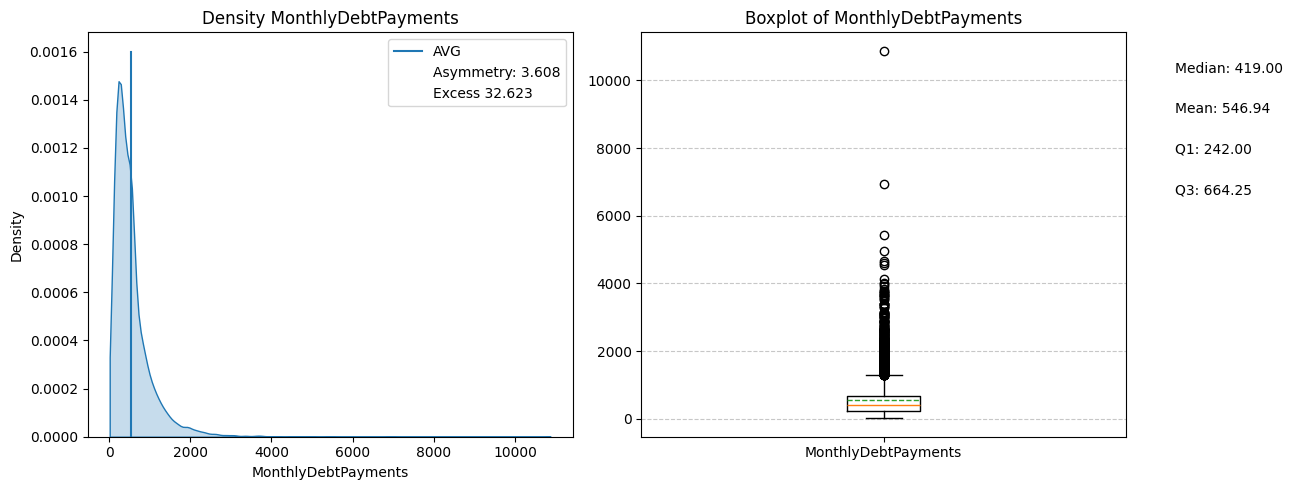

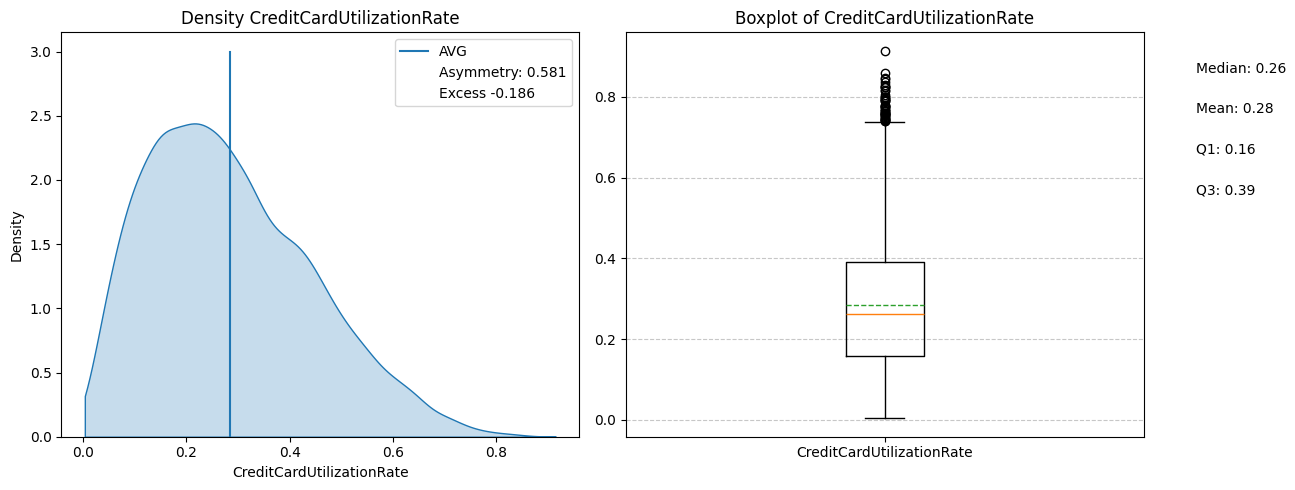

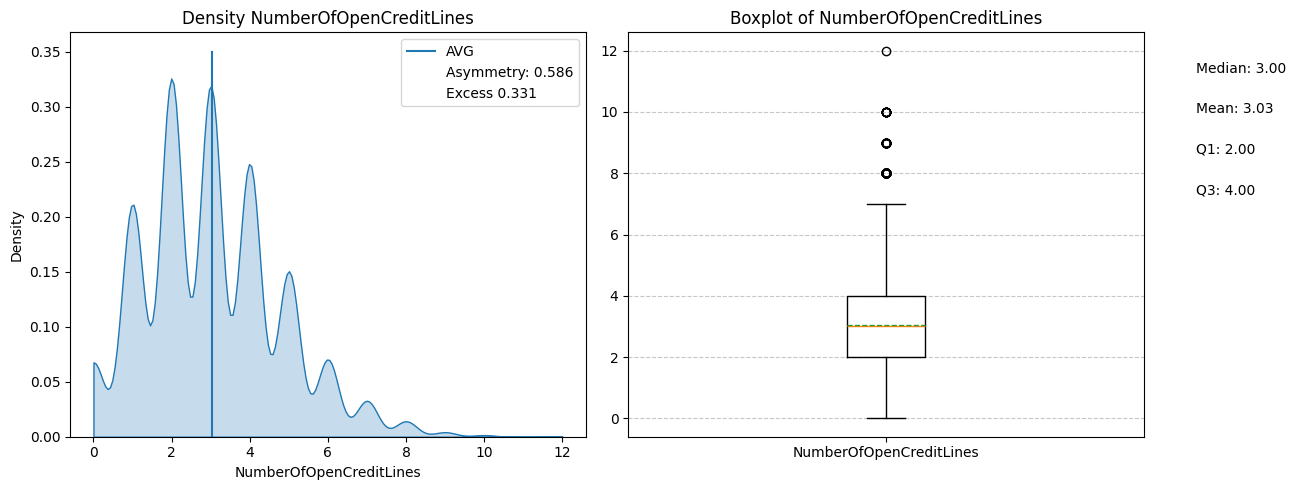

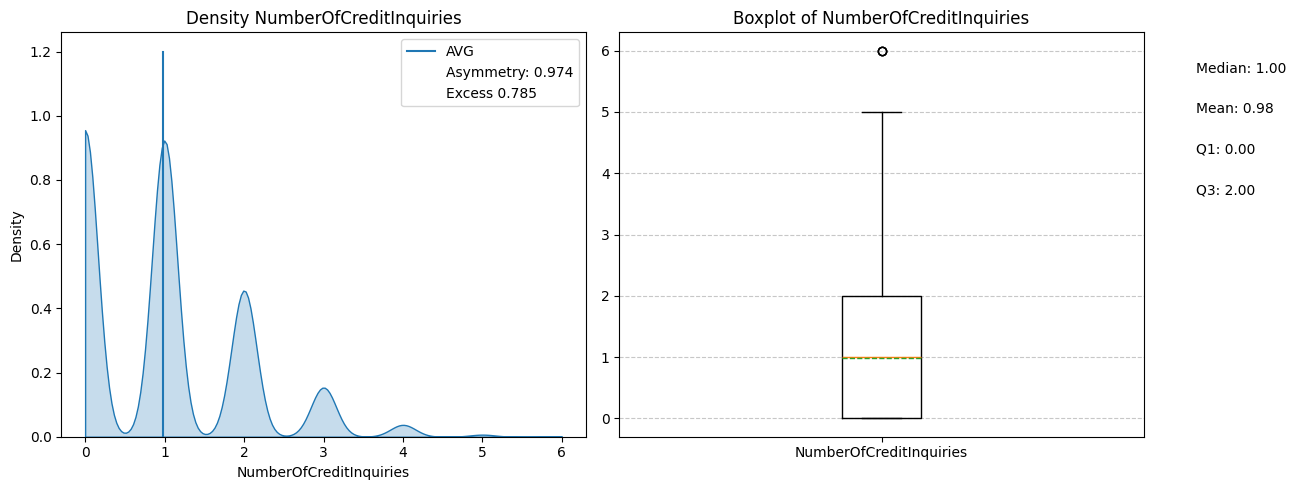

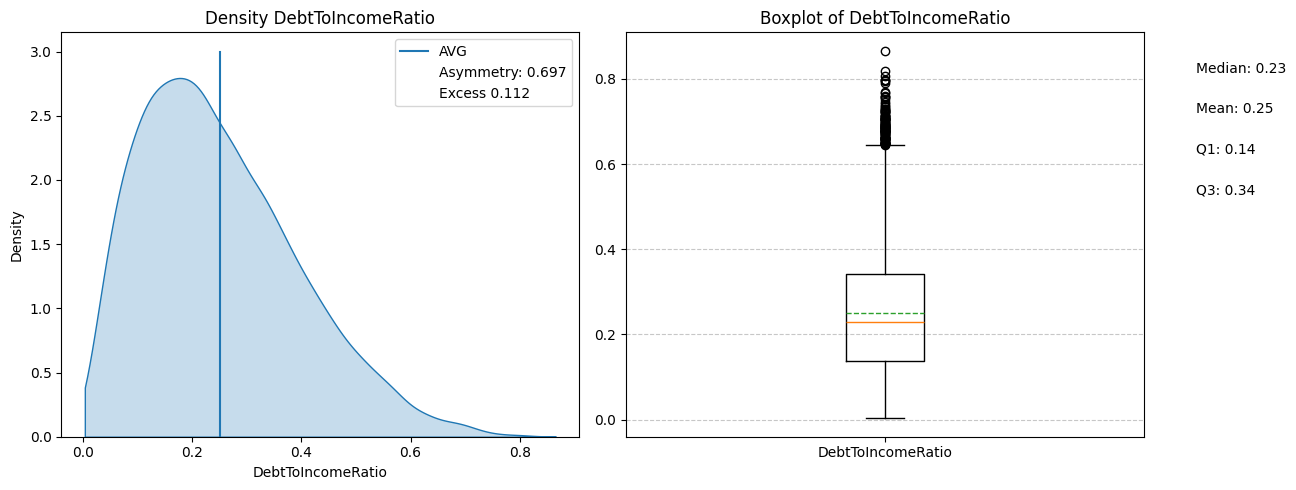

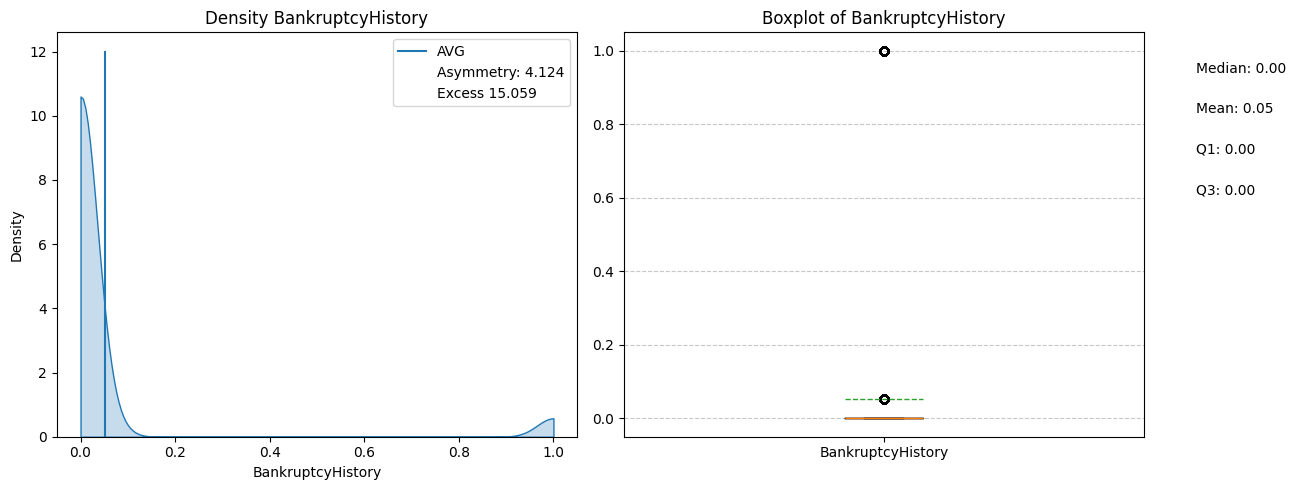

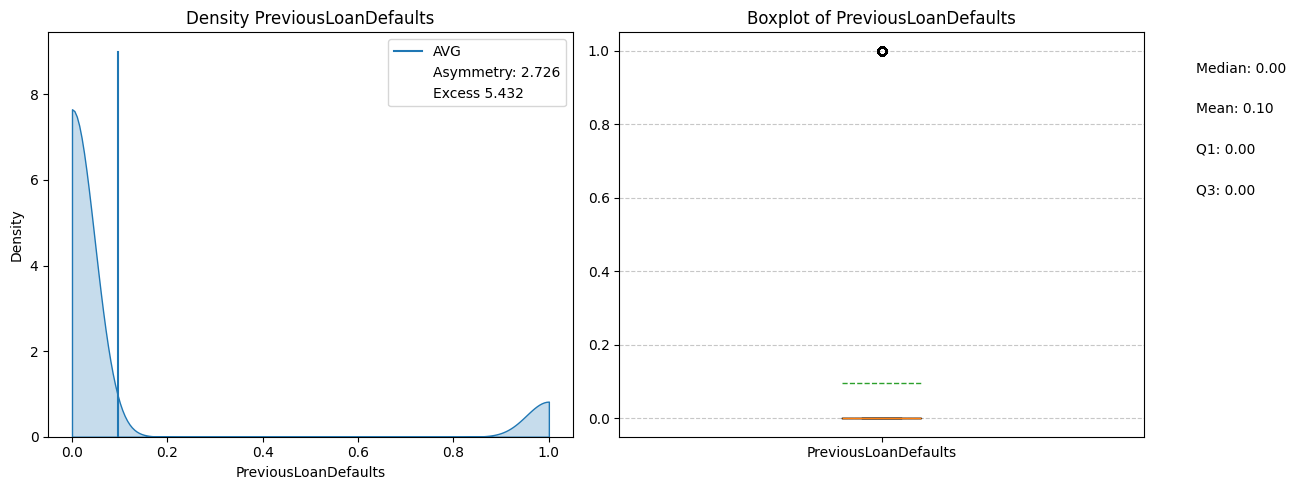

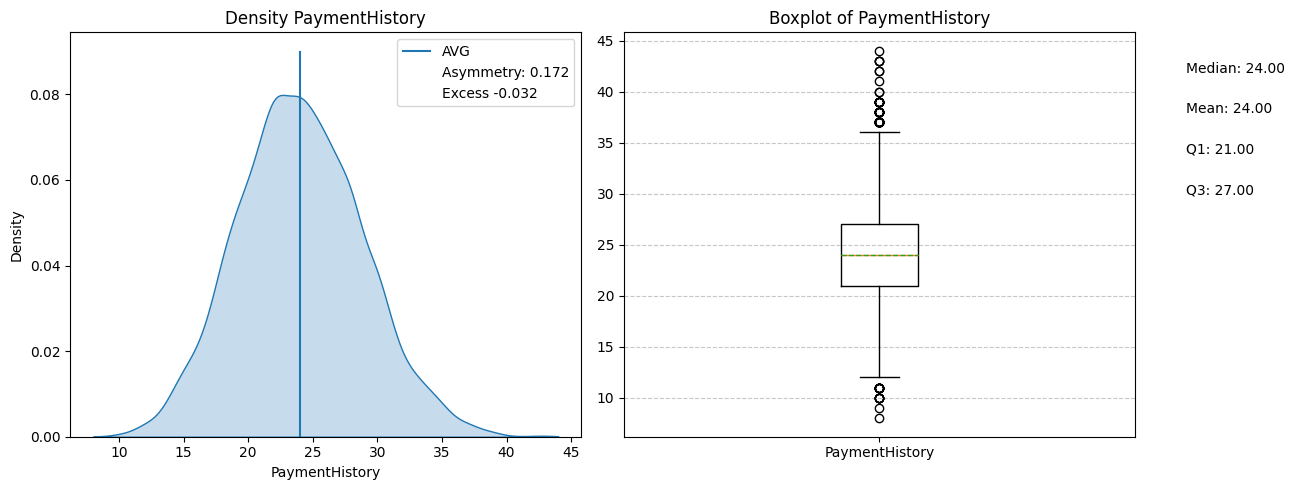

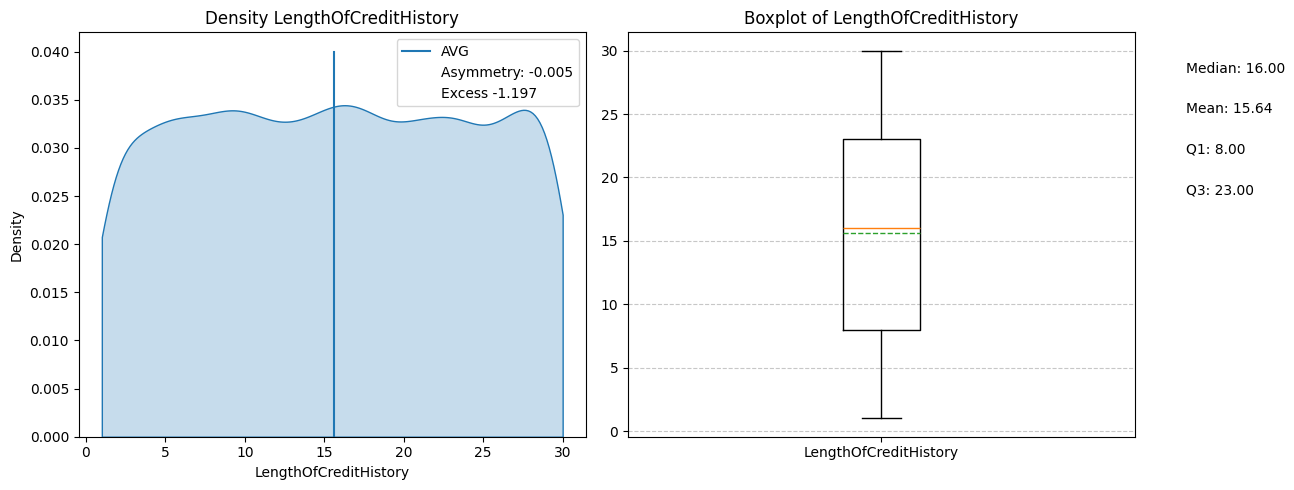

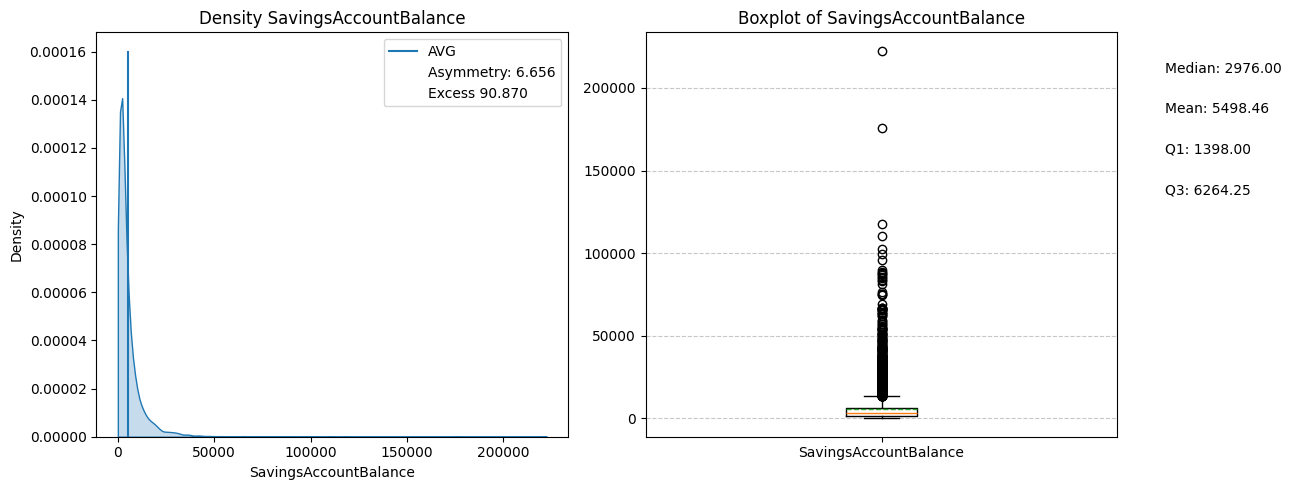

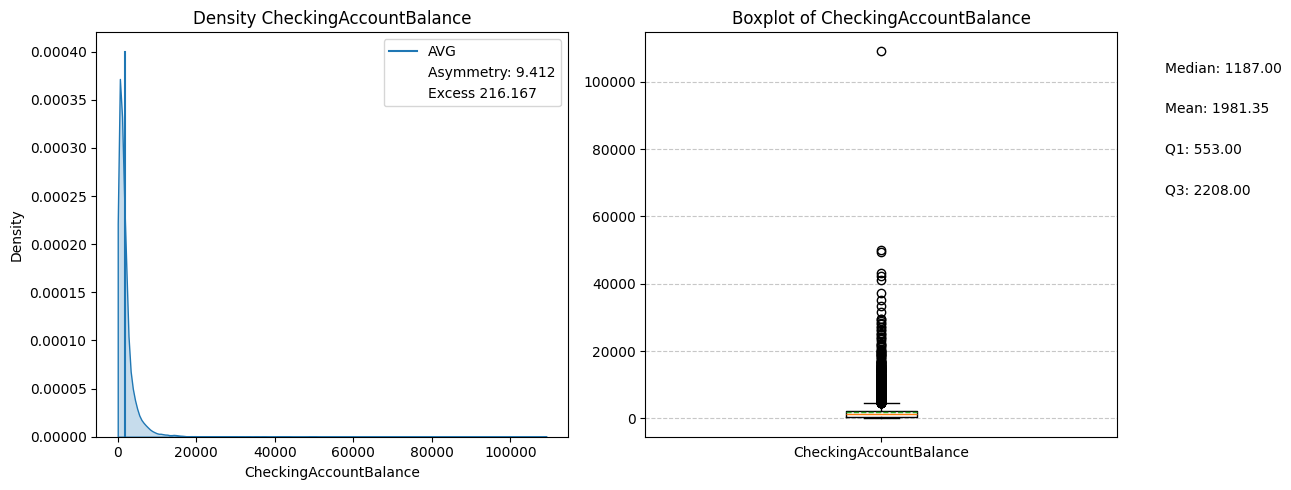

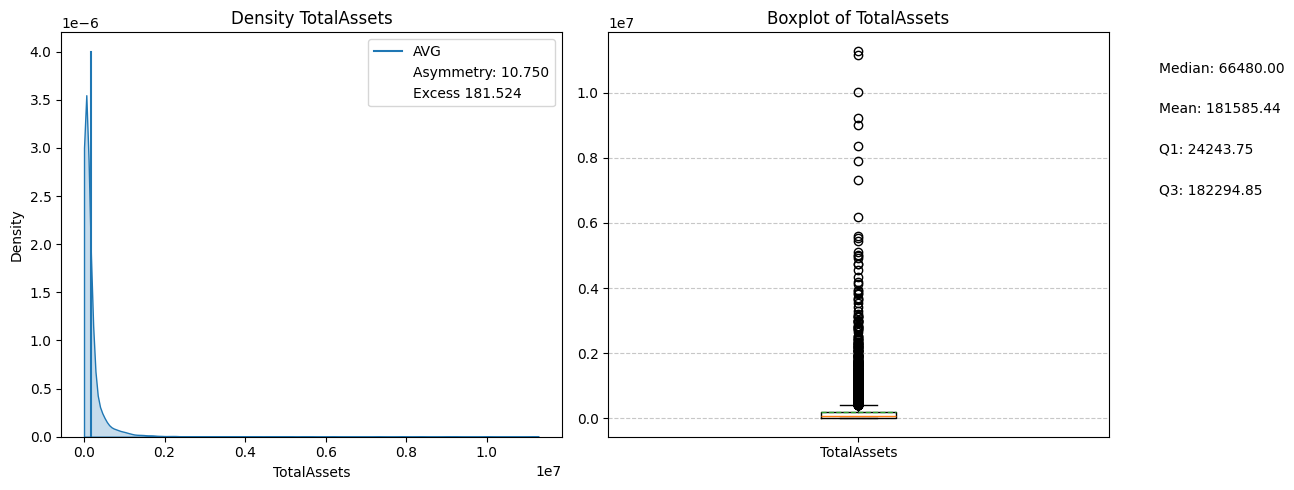

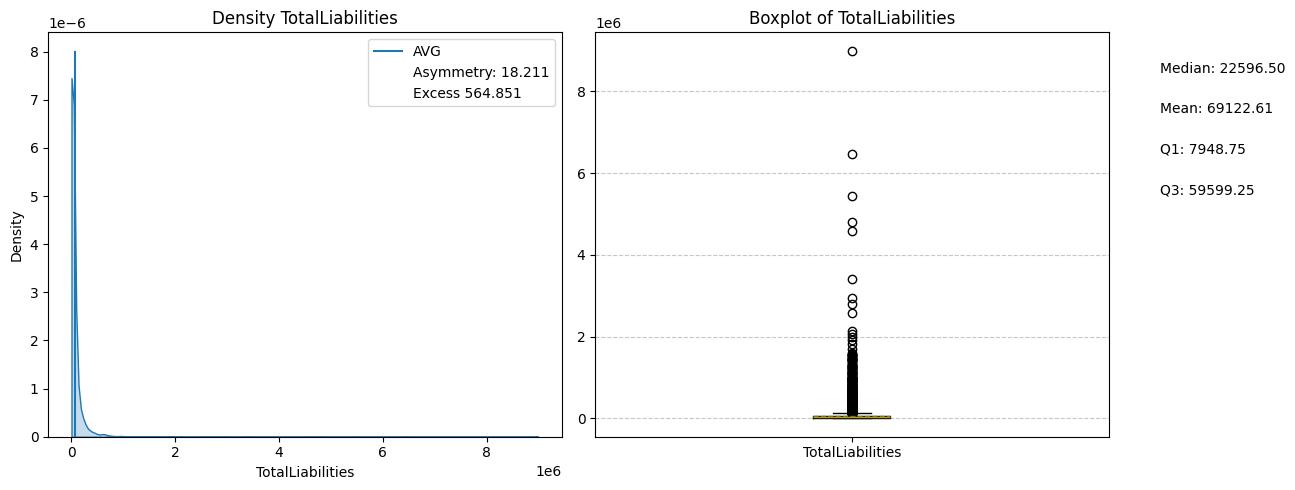

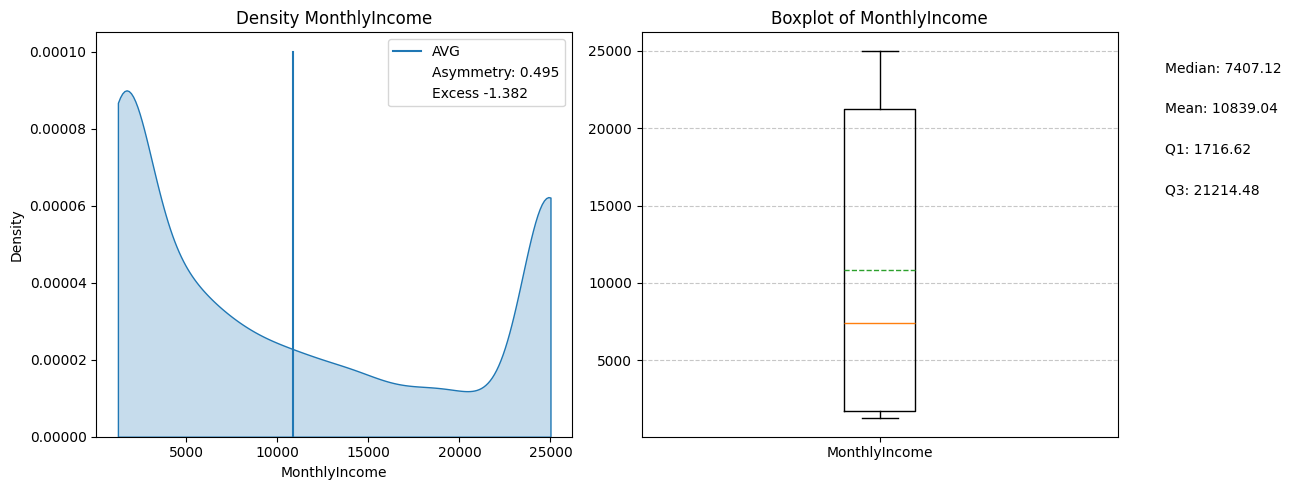

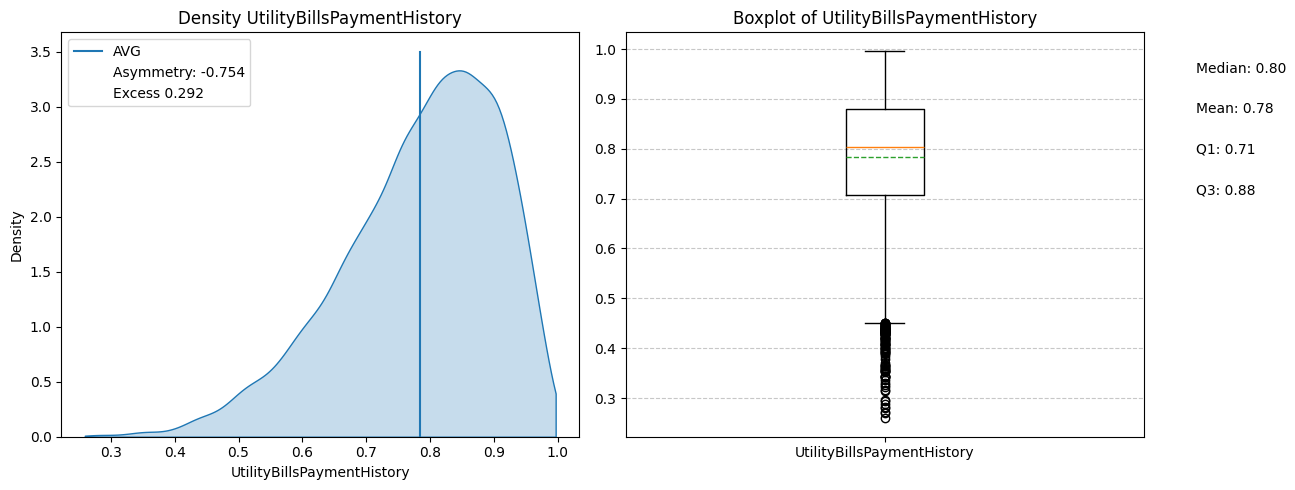

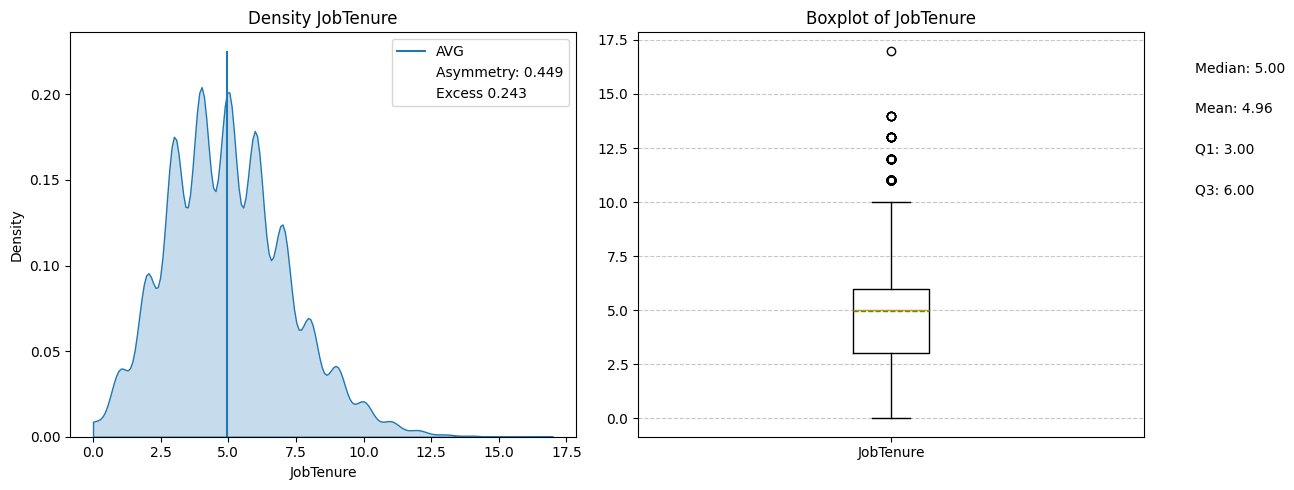

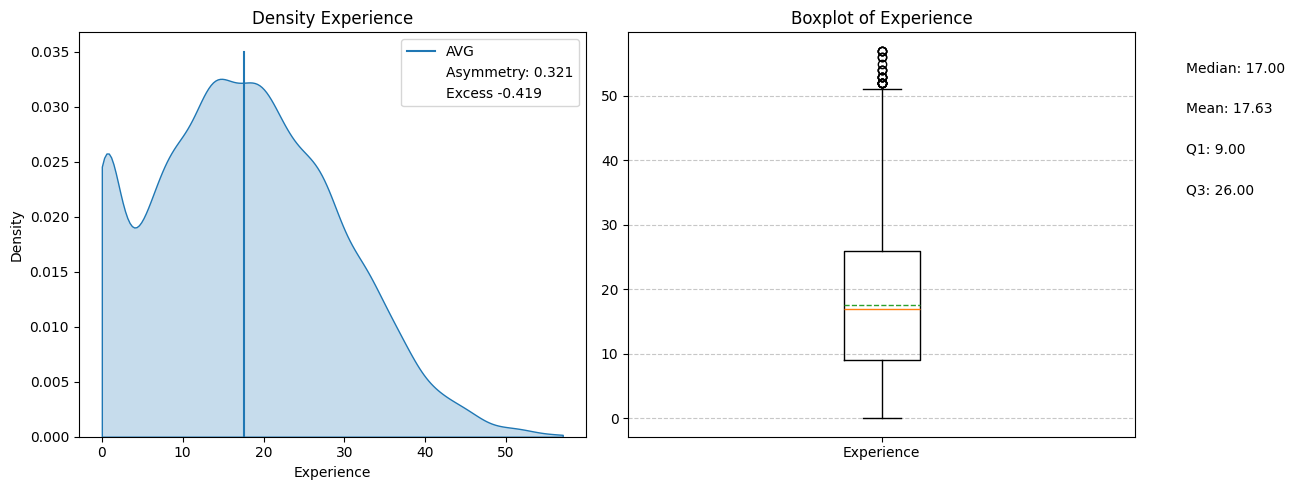

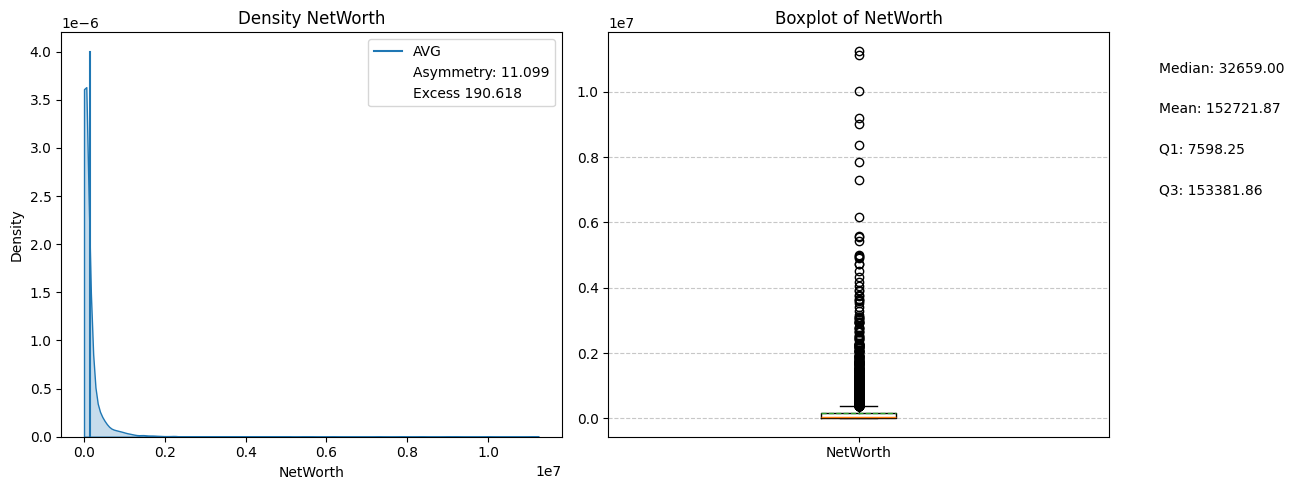

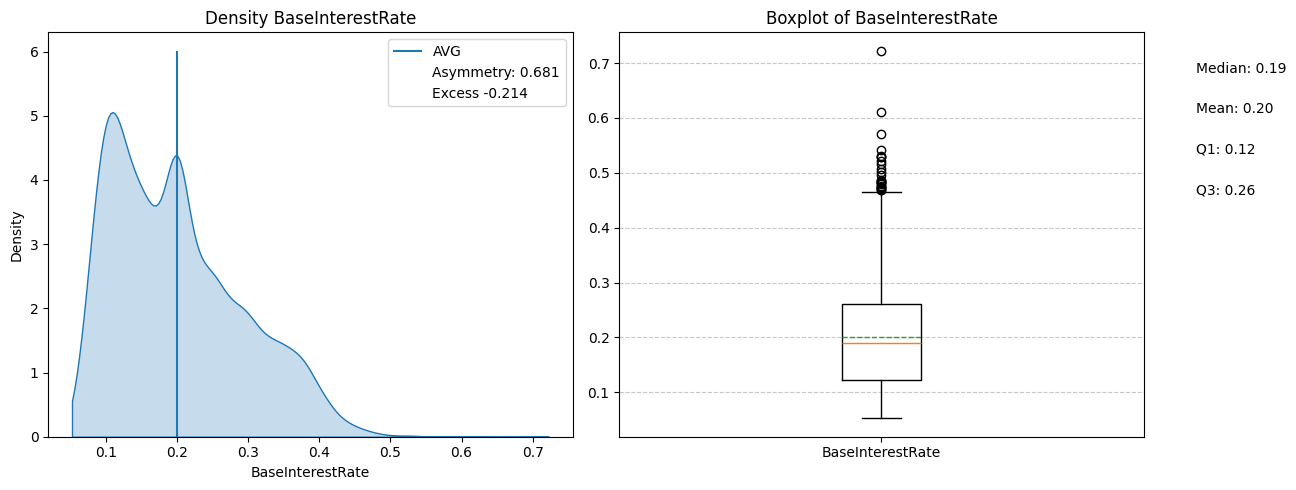

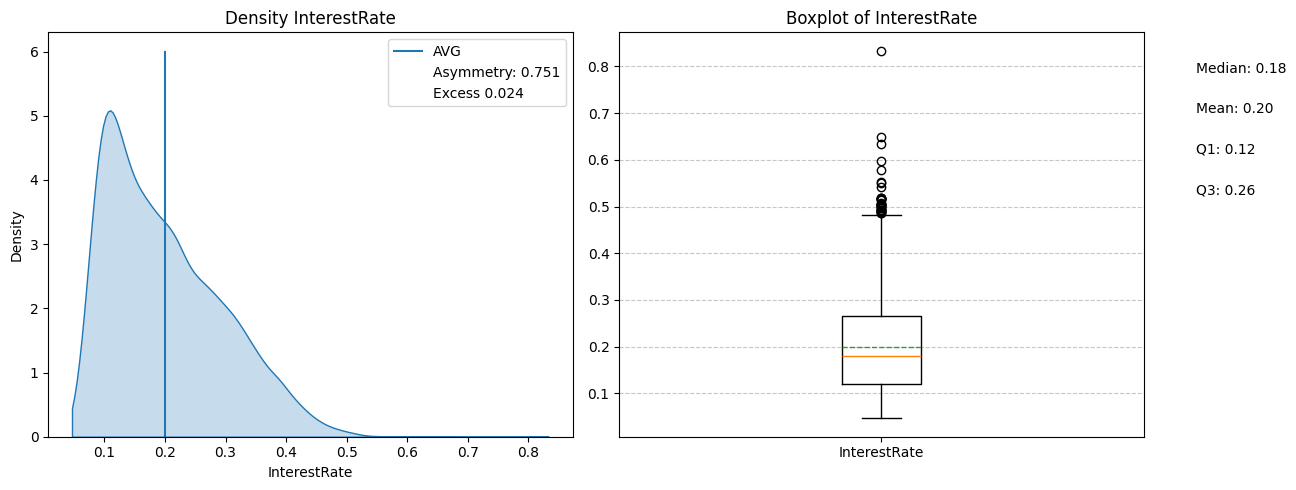

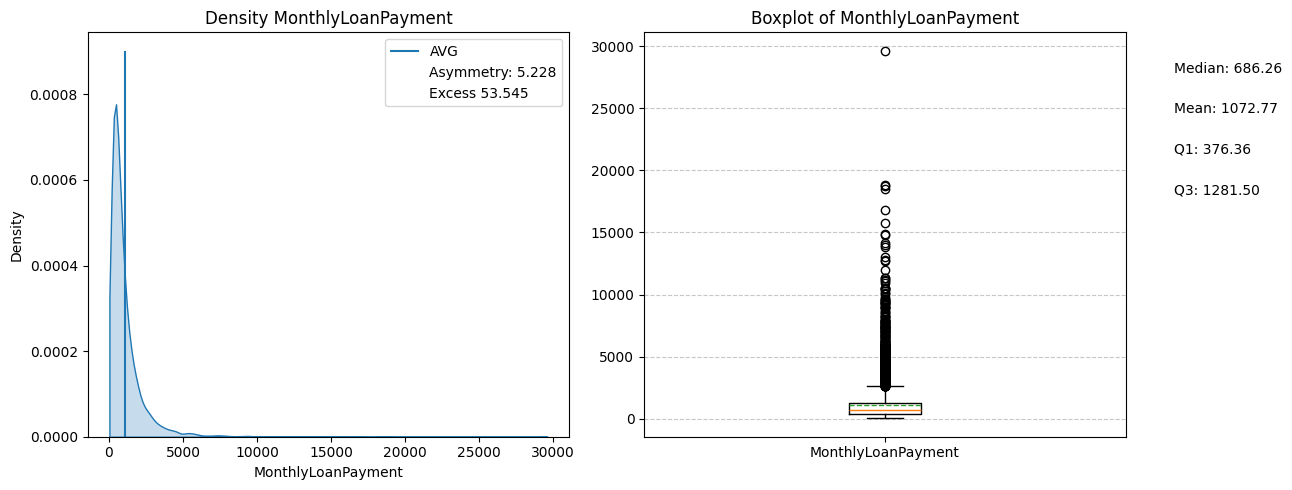

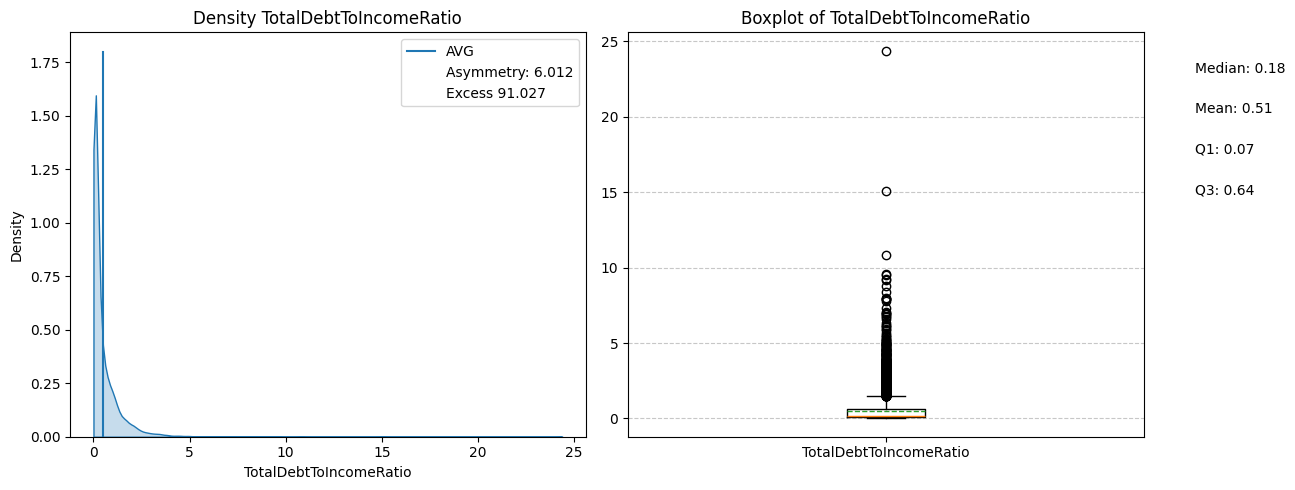

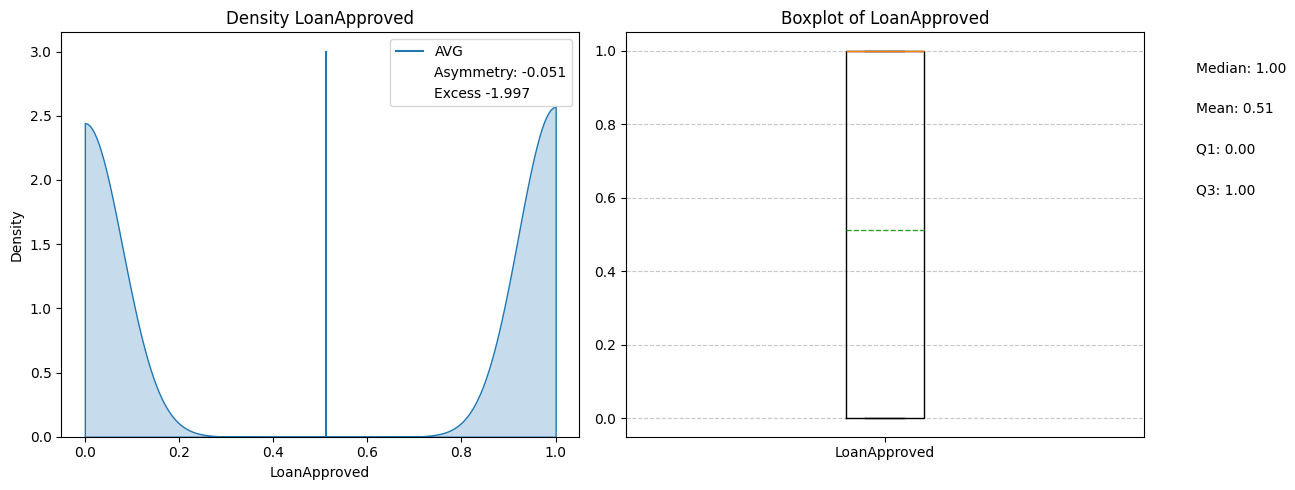

In [226]:
show_corr_matrix(buff_train_data, figsize=(15,9), grid=True)

for feature in buff_train_data[numeric_features] :
  show_distribution(train_data, feature)

# Разберемся с мультиколлинеарностью

Выберем признаки, имеющие хотя бы один коэффициент корреляции по модулю превышающий 0.7, и попробуем решить проблему коллинеарность для некоторых из них.

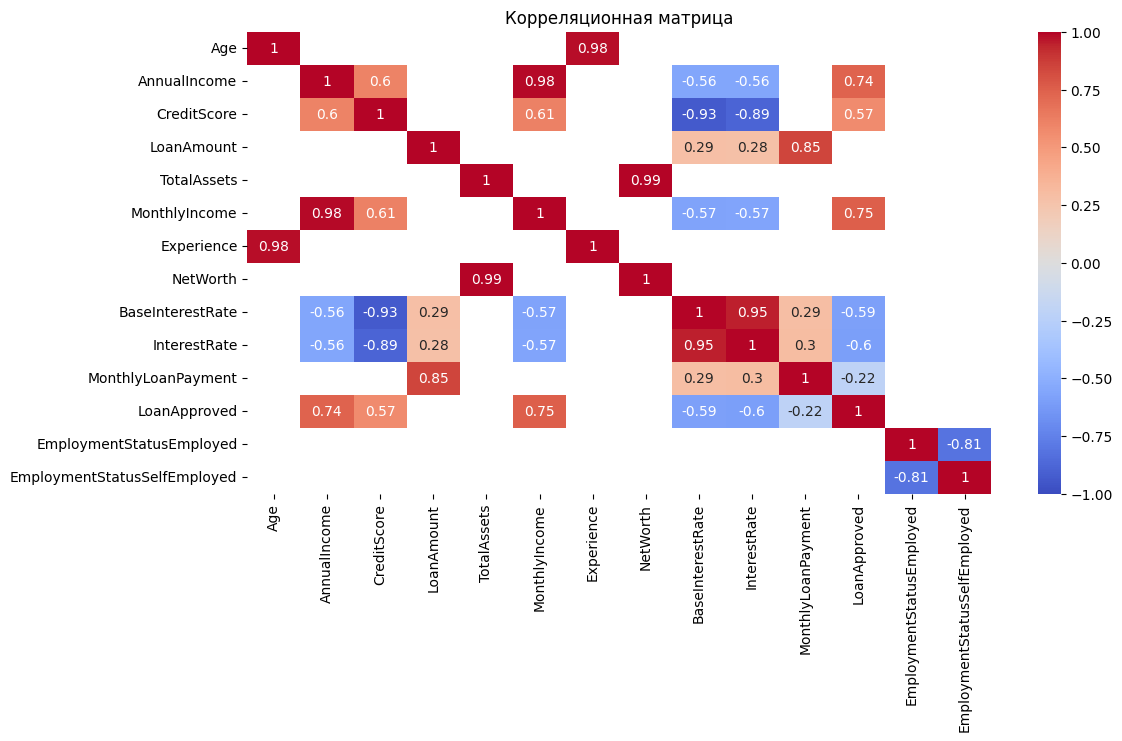

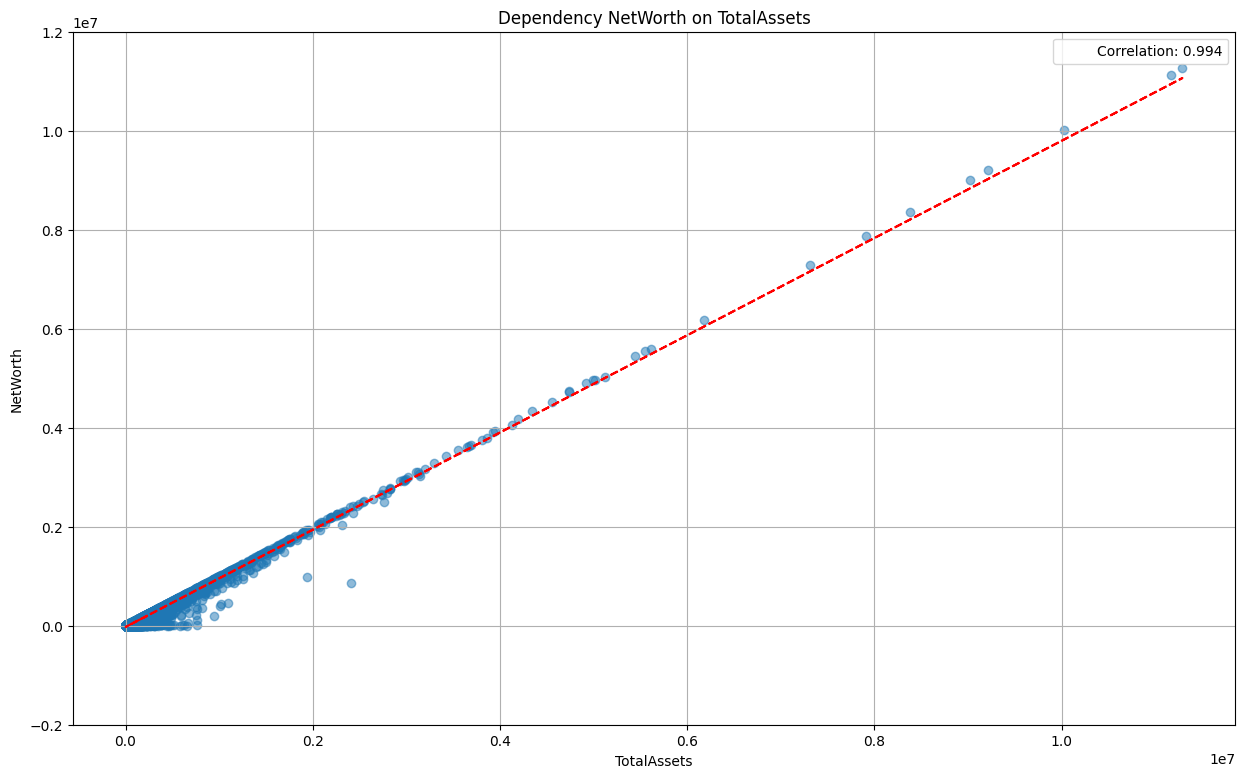

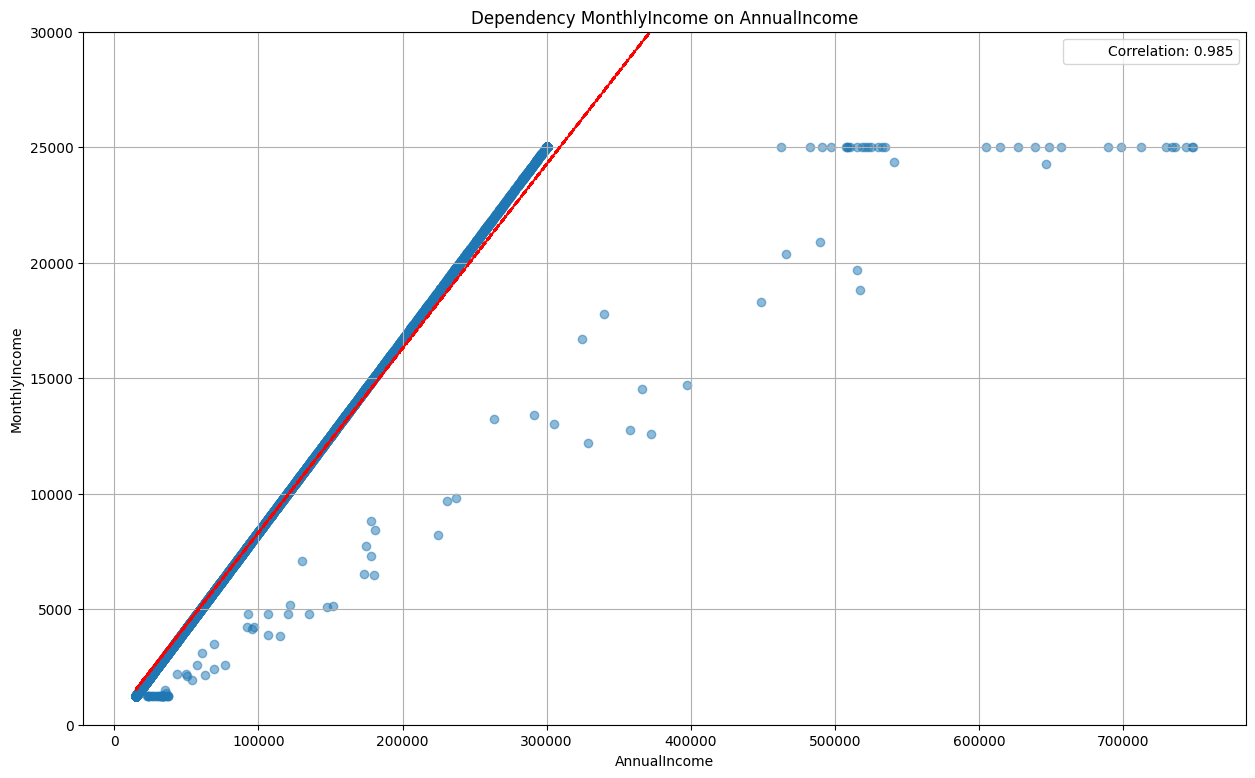

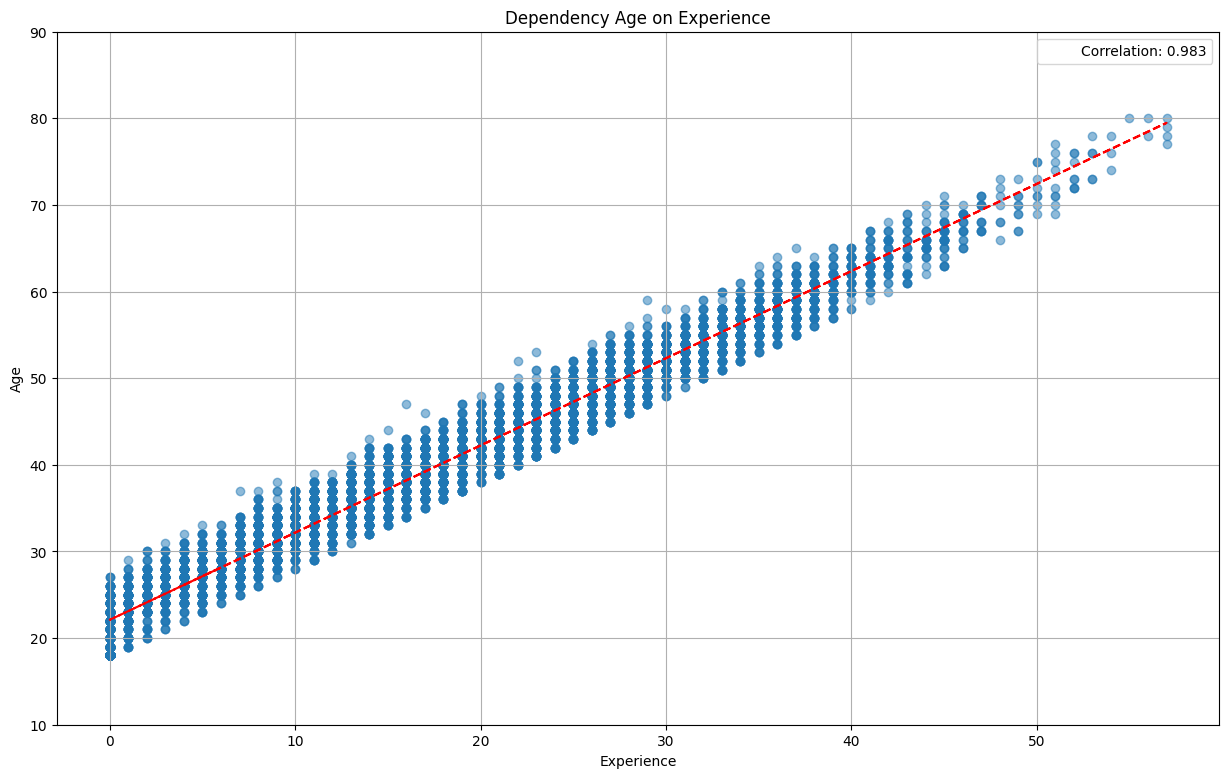

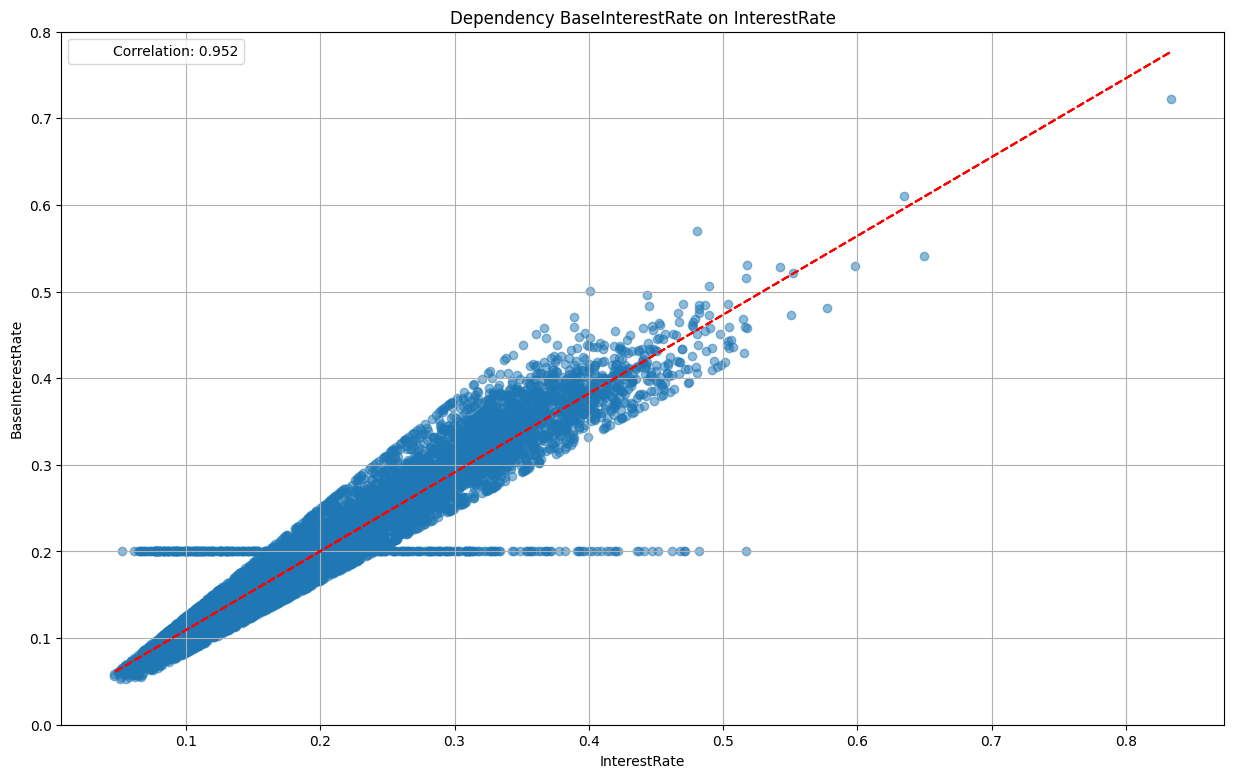

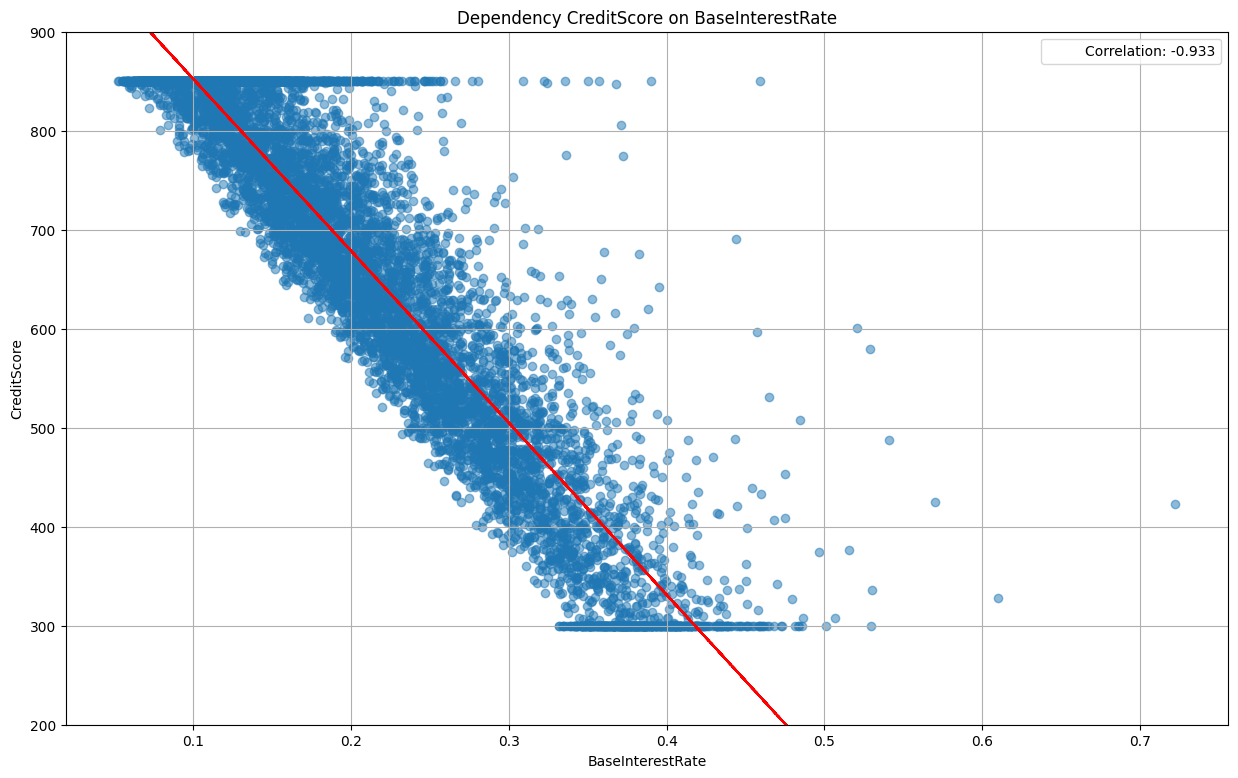

In [227]:
corr_matrix = buff_train_data.drop(columns='RiskScore', errors='ignore').corr()
columns = corr_matrix.columns

max_corr = np.empty(len(columns))

for i in range(0, len(columns)):
  tmp = corr_matrix[columns[i]].abs().values
  tmp = tmp[np.where(tmp < 1)]
  max_corr[i] = tmp.max()

weak_corr_columns = columns[np.where(max_corr < 0.7)]
show_corr_matrix(buff_train_data.drop(columns=weak_corr_columns), min_corr=0.2, annot=True)


top_corrs = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
top_corrs = top_corrs[top_corrs < 1.0].head(5)

for pair in top_corrs.index:
    show_dependency(train_data, pair[0], pair[1])

Для NetWorth и TotalAssest найдем разность - liabilities. Так же посмотрим корреляцию относительно TotalLiabilities.

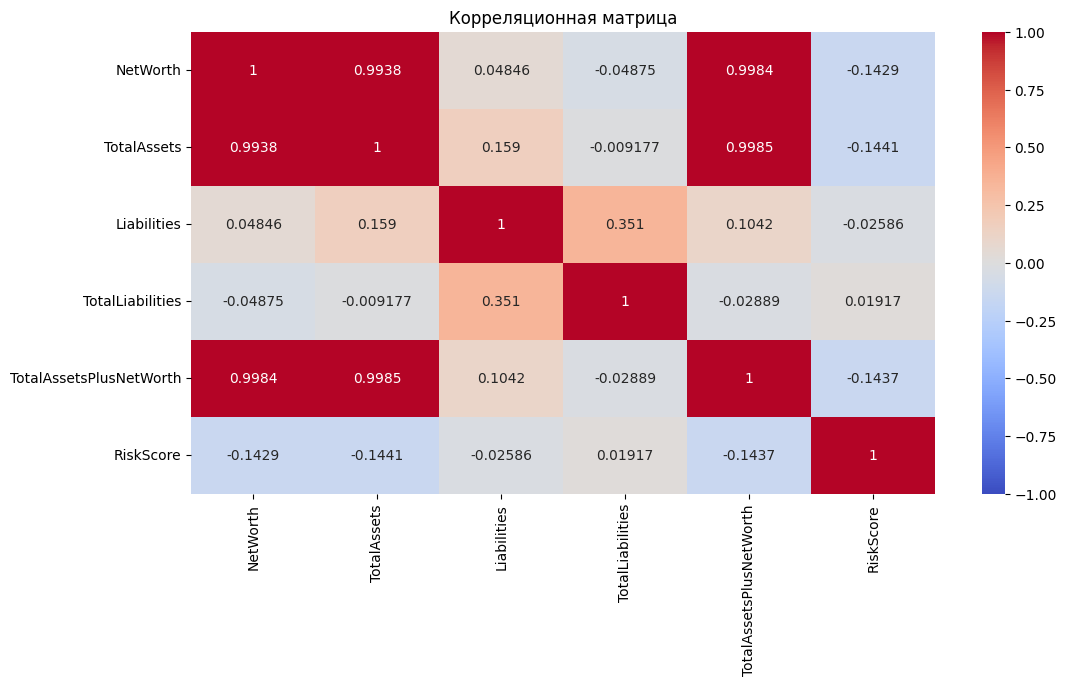

In [228]:
df = buff_train_data.copy()
df['Liabilities'] = df['TotalAssets'] - df['NetWorth']
df['TotalAssetsPlusNetWorth'] = df['TotalAssets'] + df['NetWorth']
df = df[['NetWorth', 'TotalAssets', 'Liabilities', 'TotalLiabilities', 'TotalAssetsPlusNetWorth', 'RiskScore']]
show_corr_matrix(df, annot=True, dropTarget=False, fmt='.4g')

Как и ожидалось, Liabilities - часть TotalLiabilities. На выборку сильно не влияет ни тот, ни другой. Наибольшую же корреляцию показывает TotalAssets. Оставим только его.

In [229]:
buff_train_data.drop(columns=['NetWorth'], inplace=True, errors='ignore')
buff_test_data.drop(columns=['NetWorth'], inplace=True, errors='ignore')

Годовой доход - производная месячного. В целом, можно будет оставить только что-то одно.



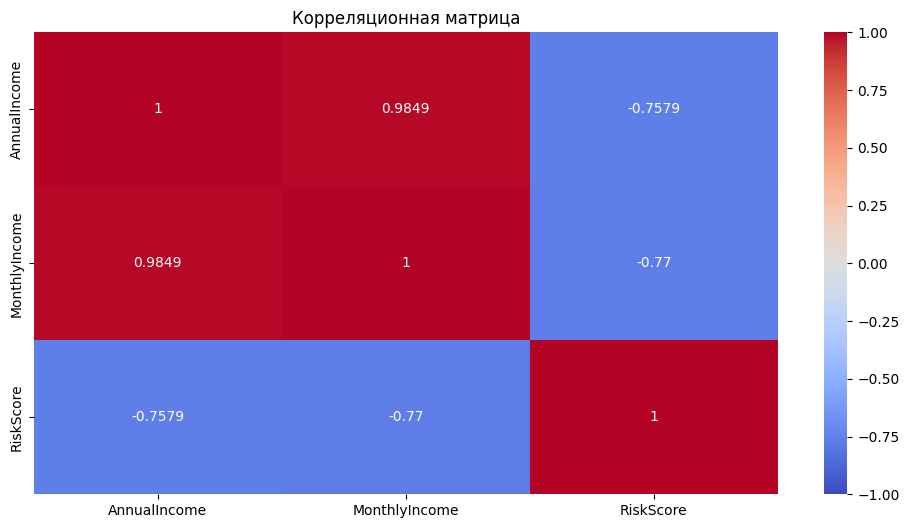

In [230]:
df = buff_train_data[['AnnualIncome', 'MonthlyIncome', 'RiskScore']]
show_corr_matrix(df, annot=True, dropTarget=False, fmt='.4g')

In [231]:
buff_train_data.drop(columns=['AnnualIncome'], inplace=True, errors='ignore')
buff_test_data.drop(columns=['AnnualIncome'], inplace=True, errors='ignore')

В случае с возрастом и опытом работы можно предположить, что какую-то роль играют безработные годы. Также, на всякий случай, посмотрим корреляцию суммы опыта и возраста.

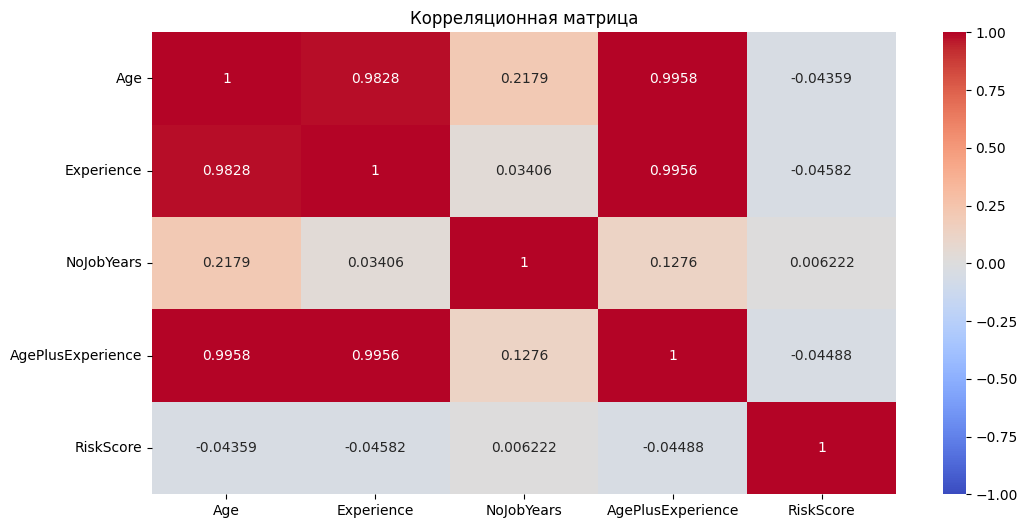

In [232]:
df = buff_train_data.copy()
df['NoJobYears'] = df['Age'] - df['Experience']
df['AgePlusExperience'] = df['Age'] + df['Experience']
df = df[['Age', 'Experience', 'NoJobYears', 'AgePlusExperience', 'RiskScore']]
show_corr_matrix(df, annot=True, dropTarget=False, fmt='.4g')

Годы без работы почти никак не влияют на таргет. Проще говоря, таргет не зависит напрямую от возраста. Опыт же вносит коррелирует с таргетом сильнее всего - оставим.

In [233]:
buff_train_data.drop(columns=['Age'], inplace=True, errors='ignore')
buff_test_data.drop(columns=['Age'], inplace=True, errors='ignore')

Все те же рассуждения о BaseInterestRate и InterestRate

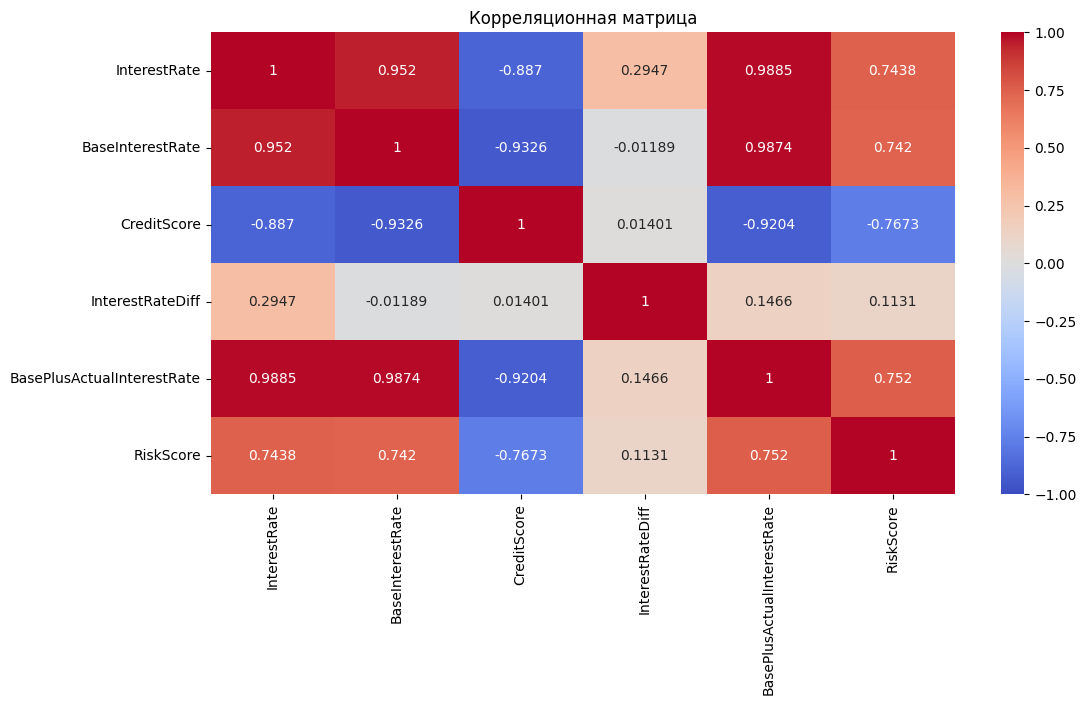

In [234]:
df = buff_train_data.copy()
df['InterestRateDiff'] = df['InterestRate'] - df['BaseInterestRate']
df['BasePlusActualInterestRate'] = df['InterestRate'] + df['BaseInterestRate']
df = df[['InterestRate', 'BaseInterestRate', 'CreditScore', 'InterestRateDiff', 'BasePlusActualInterestRate', 'RiskScore']]
show_corr_matrix(df, annot=True, dropTarget=False, fmt='.4g')

Ожидаемо, коэффициент корреляции суммы признаков большей их собственных коэффициентов, однако CreditScore, имеющий обратную зависимость от ставки показывает наибольшую корреляцию. Оставим его.

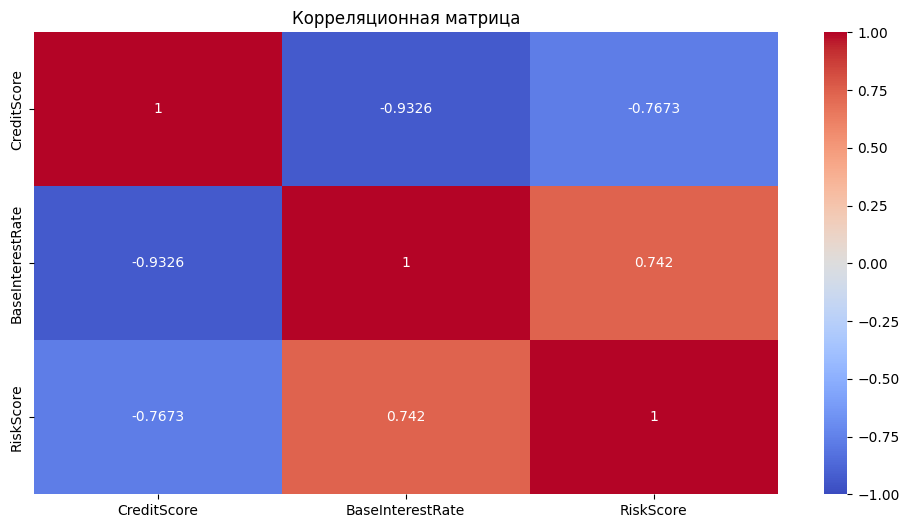

In [235]:
df = buff_train_data[['CreditScore', 'BaseInterestRate', 'RiskScore']]
show_corr_matrix(df, annot=True, dropTarget=False, fmt='.4g')

In [236]:

buff_train_data['BasePlusActualInterestRate'] = buff_train_data['InterestRate'] + buff_train_data['BaseInterestRate']
buff_test_data['BasePlusActualInterestRate'] = buff_test_data['InterestRate'] + buff_test_data['BaseInterestRate']
buff_train_data.drop(columns=['InterestRate', 'BaseInterestRate'], inplace=True, errors='ignore')
buff_test_data.drop(columns=['InterestRate', 'BaseInterestRate'], inplace=True, errors='ignore')

In [237]:
#buff_train_data.drop(columns=['InterestRate'], inplace=True, errors='ignore')
#buff_train_data.drop(columns=['BaseInterestRate'], inplace=True, errors='ignore')
#buff_test_data.drop(columns=['InterestRate'], inplace=True, errors='ignore')
#buff_test_data.drop(columns=['BaseInterestRate'], inplace=True, errors='ignore')

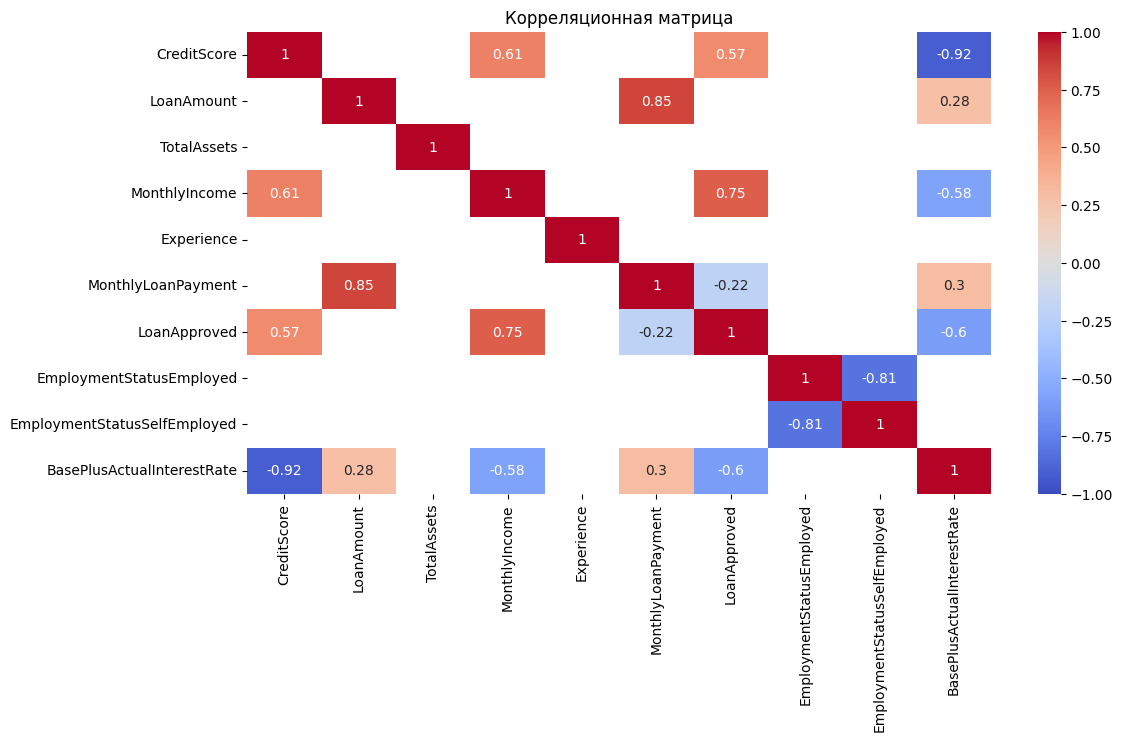

In [238]:
show_corr_matrix(buff_train_data.drop(columns=weak_corr_columns), min_corr=0.2, annot=True)

# Трансформация


Попробуем привести признаки, не похожиу на нормальное распределение, к нормальному виду.


In [239]:
buff_numeric = buff_train_data.drop(columns='RiskScore').select_dtypes(include=['int64', 'float64']).columns.tolist()
buff_numeric

['CreditScore',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'Experience',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio',
 'LoanApproved',
 'MaritalStatusDivorced',
 'MaritalStatusMarried',
 'MaritalStatusSingle',
 'HomeOwnershipStatusMortgage',
 'HomeOwnershipStatusOther',
 'HomeOwnershipStatusOwn',
 'LoanPurposeAuto',
 'LoanPurposeDebtConsolidation',
 'LoanPurposeEducation',
 'LoanPurposeHome',
 'EmploymentStatusEmployed',
 'EmploymentStatusSelfEmployed',
 'EducationLevelAssociate',
 'EducationLevelBachelor',
 'EducationLevelDoctorate',
 'EducationLevelHighSchool',
 'BasePlusActualInterestRate']

In [240]:
tf_train = buff_train_data.copy()
to_stabilized = [
    'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults',
    'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
    'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio', 'LoanApproved']

corr = buff_train_data[np.concat((to_stabilized, ['RiskScore']))].corr()
corr = corr[corr['RiskScore'].abs() >= 0.000]['RiskScore']
corr.sort_values(key=abs, ascending=False)[1:]

LoanApproved                 -0.871497
MonthlyIncome                -0.769977
CreditScore                  -0.767332
TotalDebtToIncomeRatio        0.551314
BankruptcyHistory             0.175557
MonthlyLoanPayment            0.147029
TotalAssets                  -0.144073
DebtToIncomeRatio             0.110157
LoanAmount                    0.077219
LengthOfCreditHistory        -0.060102
PreviousLoanDefaults          0.054791
CreditCardUtilizationRate     0.053632
Experience                   -0.045816
LoanDuration                  0.028770
UtilityBillsPaymentHistory    0.025609
TotalLiabilities              0.019167
MonthlyDebtPayments           0.017509
NumberOfCreditInquiries      -0.016526
PaymentHistory                0.016511
JobTenure                     0.015130
NumberOfDependents            0.008532
CheckingAccountBalance       -0.007346
NumberOfOpenCreditLines       0.002193
SavingsAccountBalance        -0.001455
Name: RiskScore, dtype: float64

In [241]:
def log_transform(df):
    df[tf_col] = df[orig_col]
    df[tf_col] = np.log(df[tf_col] + 1e-6)

def log1p_transform(df):
    df[tf_col] = df[orig_col]
    df[tf_col] = np.log1p(df[orig_col])

def boxcox(df, l):
    if l == 0:
      return np.log(df)
    return (df ** l - 1) / l

def boxcox_transform(df):
    df[tf_col] = df[orig_col]
    df[tf_col] = boxcox(df[tf_col], -4.)

def transform_train_and_test(transform_func):
    buff_train_data.assign(temp_f=transform_func(buff_train_data))
    buff_test_data.assign(temp_f=transform_func(buff_test_data))
    buff_train_data.drop(columns=[orig_col], inplace=True)
    buff_test_data.drop(columns=[orig_col], inplace=True)

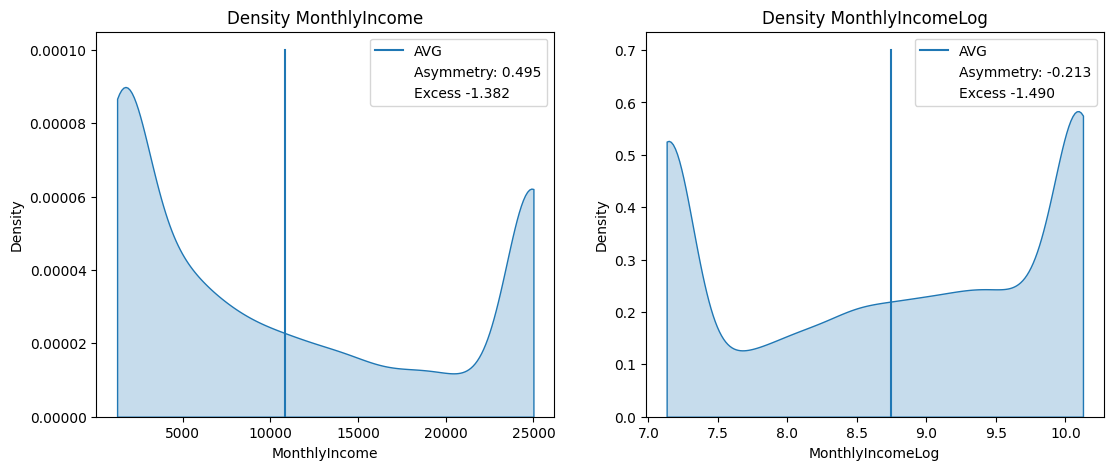

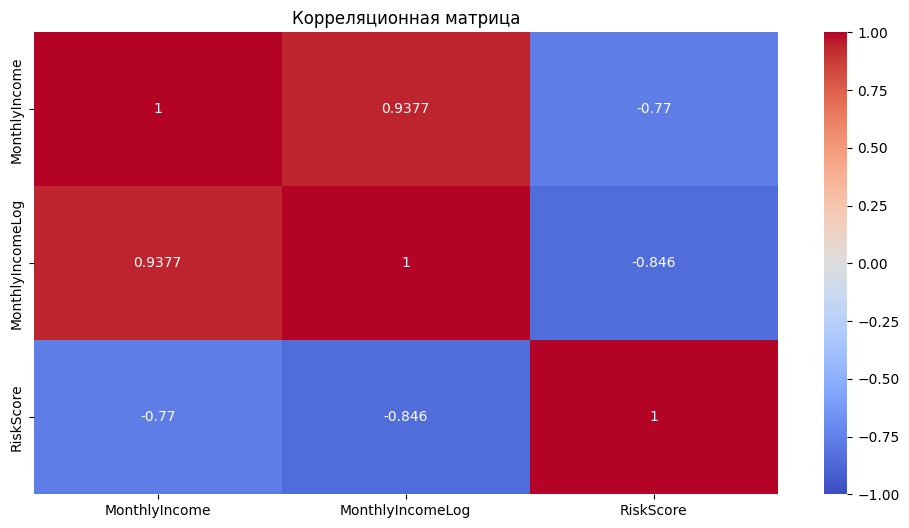

KeyError: 'MonthlyIncome'

In [259]:
log_pos = ['MonthlyIncome', 'TotalDebtToIncomeRatio', 'LengthOfCreditHistory', 'TotalLiabilities',
          'NumberOfCreditInquiries', 'NumberOfDependents', 'NumberOfOpenCreditLines',
           'BasePlusActualInterestRate'] # Should BPAI be dropped?

for orig_col in log_pos :
    tf_col = orig_col + 'Log'
    log_transform(tf_train)
    compare_distribution(tf_train, orig_col, tf_col)
    show_corr_matrix(tf_train[[orig_col, tf_col, 'RiskScore']], annot=True, dropTarget=False, fmt='.4g')
    transform_train_and_test(log_transform)


log1p_pos = ['TotalAssets', 'MonthlyLoanPayment']
for orig_col in log1p_pos :
    tf_col = orig_col + 'Log'
    log1p_transform(tf_train)
    compare_distribution(tf_train, orig_col, tf_col)
    show_corr_matrix(tf_train[[orig_col, tf_col, 'RiskScore']], annot=True, dropTarget=False, fmt='.4g')
    transform_train_and_test(log1p_transform)

boxcox_pos = ['CreditScore']
for orig_col in boxcox_pos :
    tf_col = orig_col + 'Log'
    boxcox_transform(tf_train)
    compare_distribution(tf_train, orig_col, tf_col)
    show_corr_matrix(tf_train[[orig_col, tf_col, 'RiskScore']], annot=True, dropTarget=False, fmt='.4g')
    transform_train_and_test(boxcox_transform)

Прочие признаки либо похожи на нормальное распределение, либо ухудшают метрики линейной регрессии по преобрезование.

# Перехожим к алгоритмам


In [243]:
class MinMaxScaler:

  def __init__(self):
    self.mn = 0
    self.mx = 1

  def fit(self, values : np.ndarray):
    self.mn = np.min(values, axis=0)
    self.mx = np.max(values, axis=0)

  def transform(self, values : np.ndarray):
    return (values - self.mn) / (self.mx - self.mn)

  def fit_transform(self, values : np.ndarray):
    self.fit(values)
    return self.transform(values)

In [244]:
class ZScoreScaler:

  def __init__(self):
    self.mean = 0
    self.std = 1

  def fit(self, values : np.ndarray):
    self.mean = np.mean(values, axis=0)
    self.std = np.std(values, axis=0, ddof=0)

  def transform(self, values : np.ndarray):
    return (values - self.mean) / (self.std)

  def fit_transform(self, values : np.ndarray):
    self.fit(values)
    return self.transform(values)


# Метрики

In [245]:

def mean_squared_error(true_vector, pred_vector):
  loss = ((true_vector - pred_vector) ** 2)
  return loss.sum() / len(true_vector)

def mean_absolute_error(true_vector, pred_vector):
  loss = np.abs((true_vector - pred_vector))
  return loss.sum() / len(true_vector)

def mean_absolute_percentage_error(true_vector, pred_vector):
  loss = np.abs((true_vector - pred_vector) / true_vector)
  return loss.sum() / len(true_vector)

def r2_score(true_vector, pred_vector):
  mean = np.mean(true_vector)
  numer = ((true_vector - pred_vector) ** 2).sum()
  denom = ((true_vector - mean) ** 2).sum()
  return 1 - numer / denom

# Линейная регрессия

In [246]:
class LinearRegression:

  def fit(self, features, target):
    feat = self._intercept(features)
    target = target.reshape((feat.shape[0], 1))
    t_feat = np.transpose(feat)
    sym = np.matmul(t_feat, feat)
    inv = np.linalg.inv(sym)
    self.weights = np.matmul(np.matmul(inv, t_feat), target)

  def predict(self, features):
    feat = self._intercept(features)
    return np.matmul(feat, self.weights).reshape(-1)

  @staticmethod
  def _intercept(featutes):
    col = np.ones(shape=(featutes.shape[0], 1))
    return np.hstack((col, featutes))

In [247]:
class GDLinearRegression(LinearRegression):

  def __init__(self,
               learn_coef = 0.01,
               learn_pow = 0.25,
               max_iter = 1000,
               regularization: Literal['l1', 'l2', 'elasticNet', None] = None,
               reg_coef = 0.0001,
               net_l1_ratio = 0.15,
               random_state = None):
    if ((net_l1_ratio < 0) | (net_l1_ratio > 1)):
      raise ValueError('net_l1_ratio must be in [0;1]')
    if (random_state == None):
      random_state = round(time.time())

    self.learn_coef = learn_coef
    self.learn_pow = learn_pow
    self.max_iter = max_iter
    self.regularization = regularization
    self.reg_coef = reg_coef
    self.net_l1_ratio = net_l1_ratio
    self.rng = np.random.default_rng(seed=random_state)
    np.random.seed(random_state)

  def fit(self, features, target):
    feat = self._intercept(features)
    target = target.reshape((feat.shape[0], 1))
    iter = 0
    feat_cnt = feat.shape[1]
    w0 = np.zeros(shape=(feat_cnt, 1))
    w1 = self.rng.uniform(low=-1, high=1, size=feat_cnt).reshape((feat_cnt, 1))

    while iter < self.max_iter:
      iter += 1
      w0 = w1
      coef = self._get_learning_rate(iter)
      grad = self._get_gradient(w0, feat, target)
      reg_grad = self._get_reg_gradient(w0)
      w1 = w0 - coef * grad - reg_grad

    self.weights = w1

  def _get_learning_rate(self, k):
    return self.learn_coef / (k ** self.learn_pow)

  def _get_gradient(self, w, feat, target):
    pred = np.matmul(feat, w)
    return 2 / feat.shape[0] * feat.transpose().dot(pred - target)

  def _get_reg_gradient(self, w):
    match self.regularization:
      case 'l1':
        return self.reg_coef * np.sign(w)
      case 'l2':
        return self.reg_coef * w
      case 'elasticNet':
          return self.reg_coef * (self.net_l1_ratio * np.sign(w) + (1 - self.net_l1_ratio) * w)
      case _:
          return 0

In [248]:
class SGDLinearRegression(GDLinearRegression):

  def __init__(self,
               learn_coef = 0.1,
               learn_pow = 0.1,
               max_iter = 10000,
               regularization: Literal['l1', 'l2', 'elasticNet', None] = None,
               reg_coef = 0.0001,
               net_l1_ratio = 0.15,
               random_state = None):
    super().__init__(learn_coef, learn_pow, max_iter, regularization, reg_coef, net_l1_ratio, random_state)

  def _get_gradient(self, w, feat, target):
    chosen_row = np.random.randint(0, feat.shape[0])
    pred = np.dot(feat[chosen_row], w)
    return 2 / feat.shape[0] * feat[chosen_row].reshape(-1, 1) * (pred - target[chosen_row])

# Кросс-валидация и сравнение регрессий

In [249]:
x = buff_train_data.drop(columns='RiskScore').values
y = buff_train_data['RiskScore'].values
scaler = sk.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [250]:
def get_k_fold_score(model, x, y, fold_count, metrics=[mean_squared_error], random_state=None):
  if (fold_count <= 1):
    raise ValueError('fold count must be greater than 1')
  if (random_state == None):
      random_state = round(time.time())
  indexes = np.arange(len(y))
  np.random.seed(random_state)
  np.random.shuffle(indexes)
  folds = np.array_split(indexes, fold_count)
  scores = np.ndarray((fold_count, len(metrics)))
  for i in range(fold_count):
    train_x = np.delete(x, folds[i], axis=0)
    train_y = np.delete(y, folds[i], axis=0)
    test_x = x[folds[i]]
    test_y = y[folds[i]]

    model.fit(train_x, train_y)
    pred = model.predict(test_x)

    for j in range(len(metrics)):
      scores[i][j] = metrics[j](test_y, pred)

  return scores.mean(axis=0)

def get_leave_one_out_score(model, x, y, metrics=[mean_squared_error], random_state=None):
  return get_k_fold_score(model, x, y, len(y), metrics=metrics, random_state=random_state)


def compare_models(models, titles, fold_cnt=5, metrics=[mean_squared_error, r2_score]):
  scores = np.ndarray((len(titles),len(metrics)))
  times = np.ndarray(len(titles))

  for i in range(len(titles)):
    start = time.time()
    scores[i] = get_k_fold_score(models[i], x, y, fold_cnt, metrics=metrics, random_state=777)
    times[i] = round(1000 * (time.time() - start))

  return pd.DataFrame({'CV MSE': scores[:,0], 'CV R2': scores[:,1], 'Time, ms': times}, index=titles)

In [251]:

my_predictor = LinearRegression()
sk_predictor = sk.linear_model.LinearRegression()

models = [my_predictor, sk_predictor]
titles = ['My LinearRegression', 'SK LinearRegression']

compare_models(models, titles)

CV MSE     CV R2  Time, ms
My LinearRegression  17.588961  0.940749      99.0
SK LinearRegression  17.588961  0.940749     421.0

In [252]:
my_gd_predictor = GDLinearRegression(learn_coef=0.01, learn_pow=0.25, max_iter=1000, random_state=777)
my_sgd_predictor = SGDLinearRegression(learn_coef=10, learn_pow=0.15, max_iter=10000, random_state=777)
sk_predictor = sk.linear_model.SGDRegressor(eta0=0.01, power_t=0.25, max_iter=10000, random_state=777, penalty=None)

models = [my_gd_predictor, my_sgd_predictor, sk_predictor]
titles = ['My GDLinearRegression', 'My SGDLinearRegression', 'SK SGDLinearRegression']

compare_models(models, titles)

CV MSE     CV R2  Time, ms
My GDLinearRegression   19.278525  0.935057    1810.0
My SGDLinearRegression  18.485248  0.937733    1201.0
SK SGDLinearRegression  17.685940  0.940423     461.0

In [253]:
my_gd_predictor = GDLinearRegression(learn_coef=0.01, learn_pow=0.25, max_iter=1000, random_state=777, regularization='l1', reg_coef=1e-6)
my_sgd_predictor = SGDLinearRegression(learn_coef=10, learn_pow=0.15, max_iter=10000, random_state=777, regularization='l1', reg_coef=1e-6)
sk_predictor = sk.linear_model.SGDRegressor(eta0=0.01, power_t=0.25, max_iter=10000, random_state=777, penalty='l1', alpha=1e-6)

models = [my_gd_predictor, my_sgd_predictor, sk_predictor]
titles = ['My GDLinearRegressionL1', 'My SGDLinearRegressionL1', 'SK SGDLinearRegressionL1']

compare_models(models, titles)

CV MSE     CV R2  Time, ms
My GDLinearRegressionL1   19.278352  0.935058    2171.0
My SGDLinearRegressionL1  18.481095  0.937747    1421.0
SK SGDLinearRegressionL1  17.685846  0.940424     893.0

In [254]:
my_gd_predictor = GDLinearRegression(learn_coef=0.01, learn_pow=0.25, max_iter=1000, random_state=777, regularization='l2', reg_coef=1e-6)
my_sgd_predictor = SGDLinearRegression(learn_coef=10, learn_pow=0.15, max_iter=10000, random_state=777, regularization='l2', reg_coef=1e-6)
sk_predictor = sk.linear_model.SGDRegressor(eta0=0.01, power_t=0.25, max_iter=10000, random_state=777, penalty='l2', alpha=1e-6)

models = [my_gd_predictor, my_sgd_predictor, sk_predictor]
titles = ['My GDLinearRegressionL2', 'My SGDLinearRegressionL2', 'SK SGDLinearRegressionL2']

compare_models(models, titles)

CV MSE     CV R2  Time, ms
My GDLinearRegressionL2   19.291225  0.935015    1774.0
My SGDLinearRegressionL2  18.512770  0.937640     775.0
SK SGDLinearRegressionL2  17.685940  0.940423     274.0

In [255]:

my_gd_predictor = GDLinearRegression(learn_coef=0.01, learn_pow=0.25, max_iter=1000, random_state=777, regularization='elasticNet', reg_coef=1e-6)
my_sgd_predictor = SGDLinearRegression(learn_coef=10, learn_pow=0.15, max_iter=10000, random_state=777, regularization='elasticNet', reg_coef=1e-6)
sk_predictor = sk.linear_model.SGDRegressor(eta0=0.01, power_t=0.25, max_iter=10000, random_state=777, penalty='elasticnet', alpha=1e-6)

models = [my_gd_predictor, my_sgd_predictor, sk_predictor]
titles = ['My GDLinearRegressionL2', 'My SGDLinearRegressionL2', 'SK SGDLinearRegressionL2']

compare_models(models, titles)

CV MSE     CV R2  Time, ms
My GDLinearRegressionL2   19.289276  0.935021    2082.0
My SGDLinearRegressionL2  18.507342  0.937659    1641.0
SK SGDLinearRegressionL2  17.685926  0.940423     470.0

In [258]:

predictor = LinearRegression()

x = buff_train_data.drop(columns='RiskScore').values
y = buff_train_data['RiskScore'].values
t = buff_test_data.drop(columns='ID').values

scaler = ZScoreScaler()
x = scaler.fit_transform(x)
t = scaler.transform(t)

predictor.fit(x, y)
pred = predictor.predict(t)

df = pd.DataFrame({'ID': np.arange(0, len(pred)), 'RiskScore': pred.reshape(-1)})
df.to_csv('res.csv', index=False)